## Problem Statement

**Solomon Akatakpo (PhD.)**

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [286]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
data = pd.read_csv("BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [4]:
# Checking the number of rows and columns in the training data
data.shape

(10127, 21)

The dataset has 10127 rows and 21 columns

In [6]:
# let's create a copy of the data
data1 = data.copy()

### Displaying the first few rows of the dataset

In [15]:
# let's view the first 10 rows of the data
data1.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


In [10]:
# let's view the last 10 rows of the data
data1.tail(10)  

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,abc,Blue,47,4,3,3,14657.000,2517,12140.000,0.166,6009,53,0.514,0.172
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [11]:
# let's check the data types of the columns in the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are six object data types and 15 numerical data types

### Checking for duplicate values

In [12]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

There are no duplicates in the dataset

### Checking for missing values

In [13]:
# let's check for missing values in the data
data1.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

The Education_Level column has 1519 missing values while the Marital_Status column has 749 columns

### Statistical summary of the dataset

In [17]:
# let's view the statistical summary of the numerical columns in the data
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


#### Observations:
* CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
* Customer_Age: Average age of customers is 46 years, age of customers has a wide range from 26 to 73 years.
* Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
* Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
* Total_Relationship_Count: All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank.
* Months_Inactive_12_mon: On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity leads to churning of a customer.
* Contacts_Count_12_mon: On average bank and customers interacted twice in the past 12 months.
* Credit_Limit: There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* Total_Revolving_Bal: Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
* Avg_Open_To_Buy: Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
* Total_Amt_Chng_Q4_Q1: For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1 (as value is equal to ~0.9).
* Total_Trans_Amt: Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
* Total_Trans_Ct: On average customers made 64 or fewer transactions while 75% of the customers made 81 transactions.
* Total_Ct_Chng_Q4_Q1: For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1.
* Avg_Utilization_Ratio: On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.

In [18]:
data1.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [19]:
for i in data1.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

In [20]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data1.drop(["CLIENTNUM"], axis=1, inplace=True)

In [21]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [22]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [24]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

**Customer_Age**

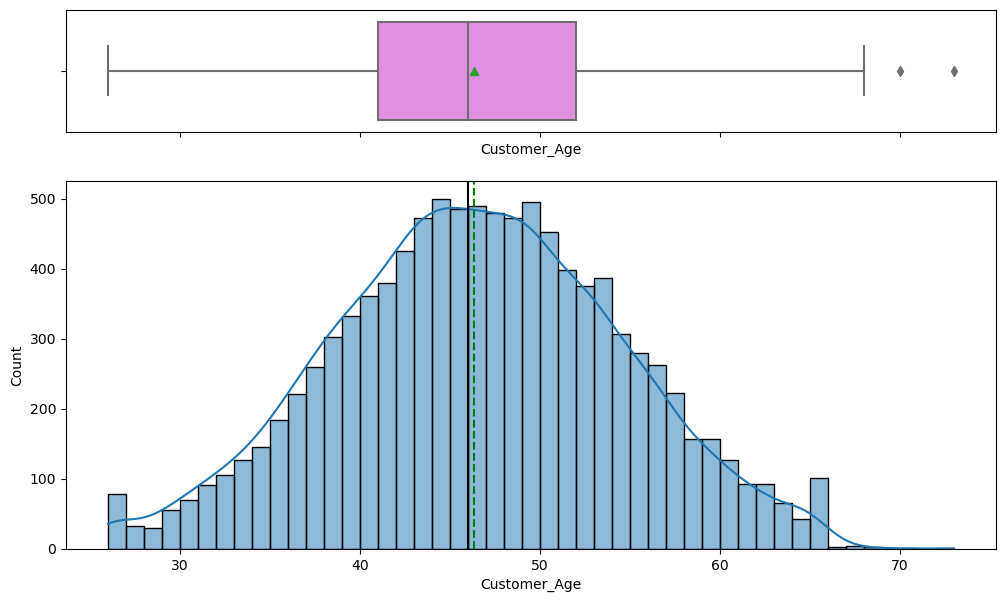

In [26]:
histogram_boxplot(data1, "Customer_Age", kde=True)

The customer age data is normally distributed, with a mean of 46 and median ~ 46.2 ( and has outliers in the upper bounds

`Months_on_book`

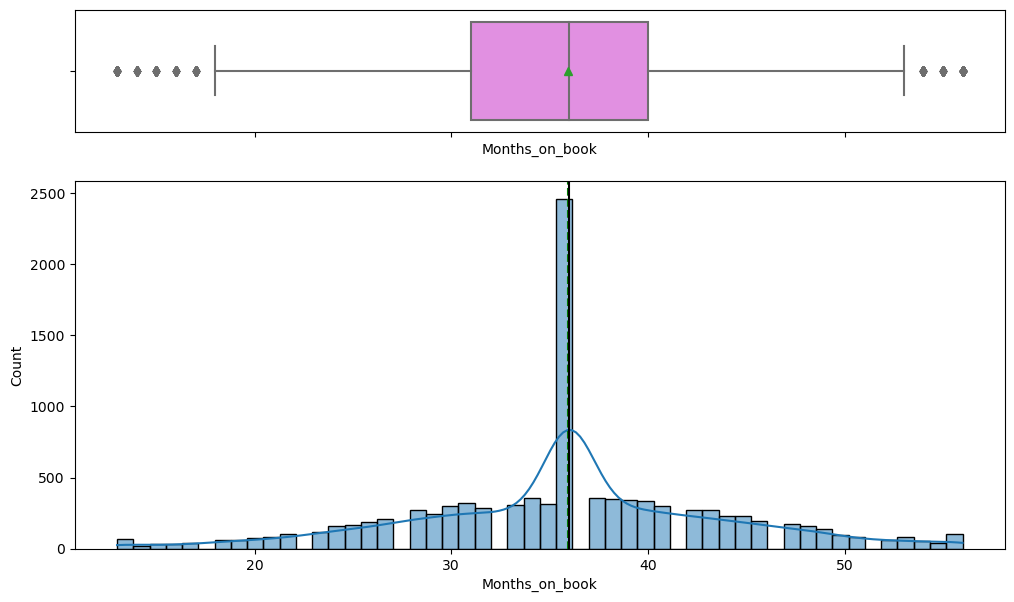

In [31]:
histogram_boxplot(data1, "Months_on_book", kde=True)

The Months_on_book has a normal distribution with mean and median of ~36

**Credit_Limit**

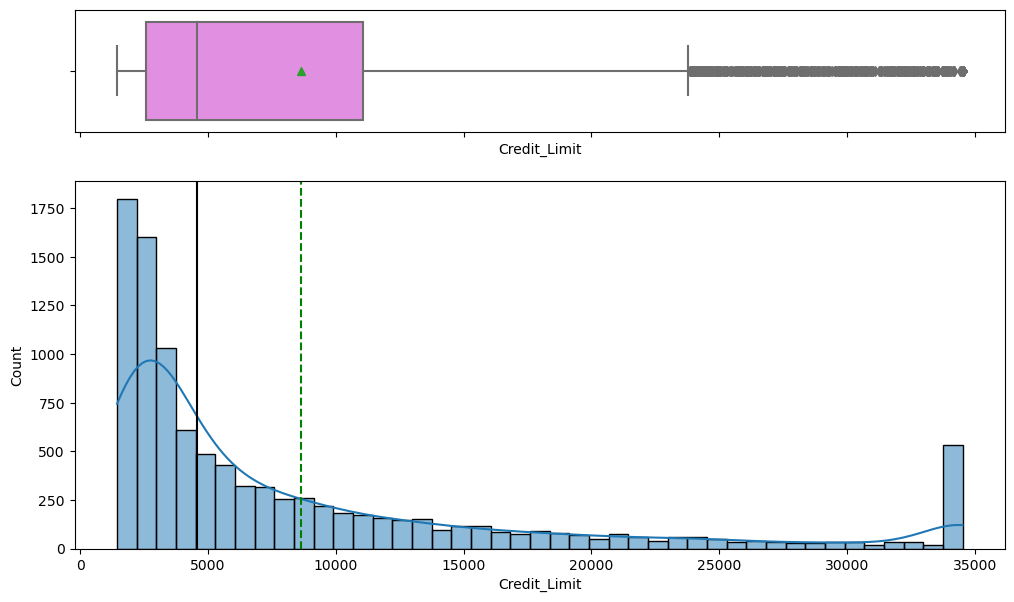

In [32]:
histogram_boxplot(data1, "Credit_Limit", kde=True) 

The credit limit data is highly rightly skewed with a mean of 8631.94 and median of 4549

**Total_Revolving_Bal**

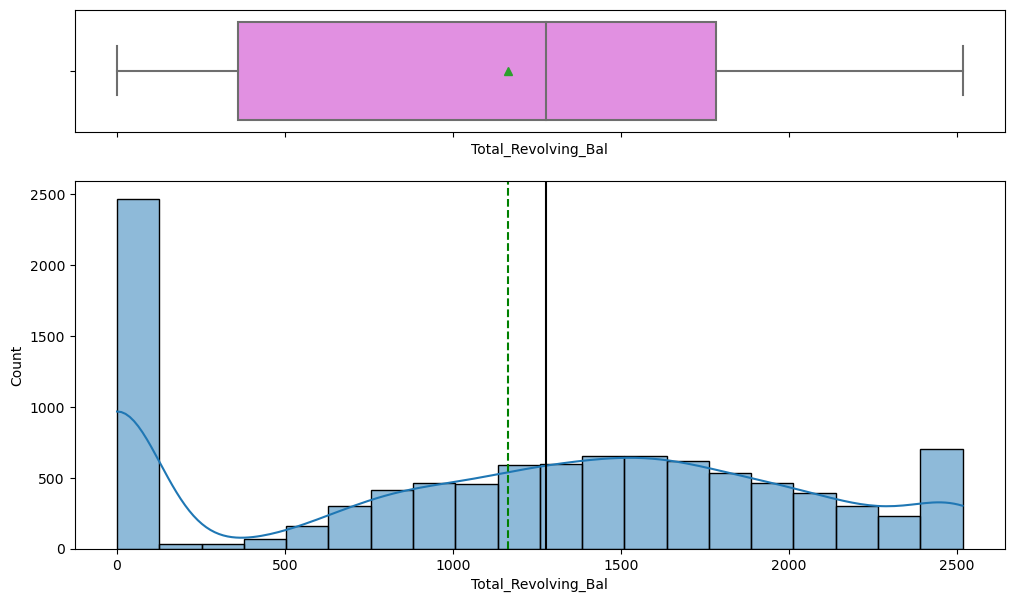

In [34]:
histogram_boxplot(data1, "Total_Revolving_Bal", kde=True)

The total revolving balance data has a mean of 1162 and median of 1276

**Avg_Open_To_Buy**

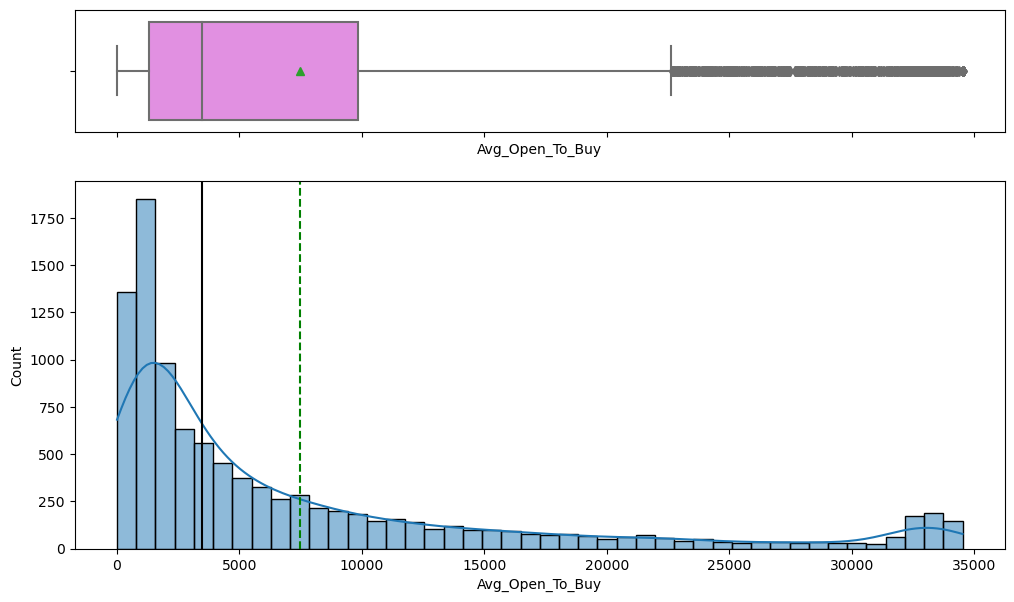

In [35]:
histogram_boxplot(data1, "Avg_Open_To_Buy", kde=True)

The average open to buy credit line for the last 12 months data is right skewed with a mean of 7469 and median of 3474
The data has outliers on the upper bounds of the data

**Total_Trans_Ct**

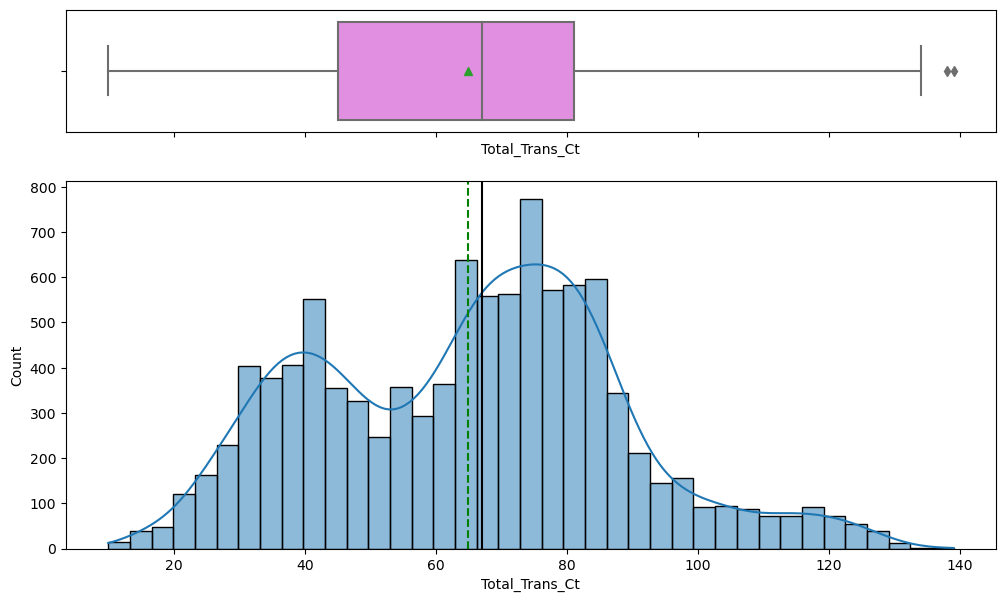

In [36]:
histogram_boxplot(data1, "Total_Trans_Ct", kde=True)

The total transaction counts has two peaks i.e. bimodal distribution. This total transaction count has a mean of 64.8 and median of 67.
The data has two outliers on the upper bounds

**Total_Amt_Chng_Q4_Q1**

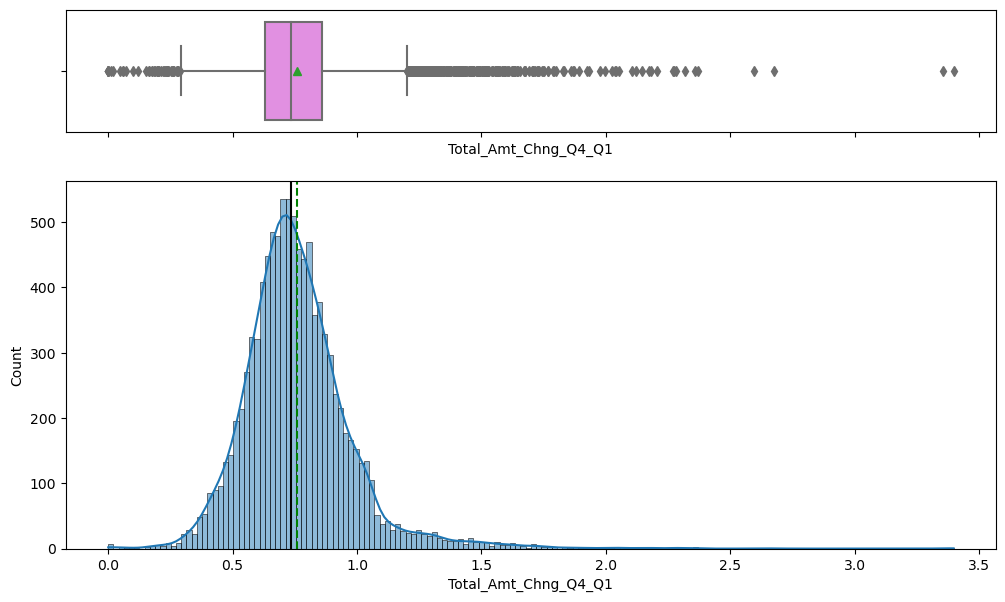

In [37]:
histogram_boxplot(data1, "Total_Amt_Chng_Q4_Q1", kde=True) 

The total transaction change Q4 over Q1 has an almost normal distribution with a mean of 0.760 and median 0.736
This data has outliers in both the upper bounds and the lower bounds

**Let's see total transaction amount distributed**

**Total_Trans_Amt**

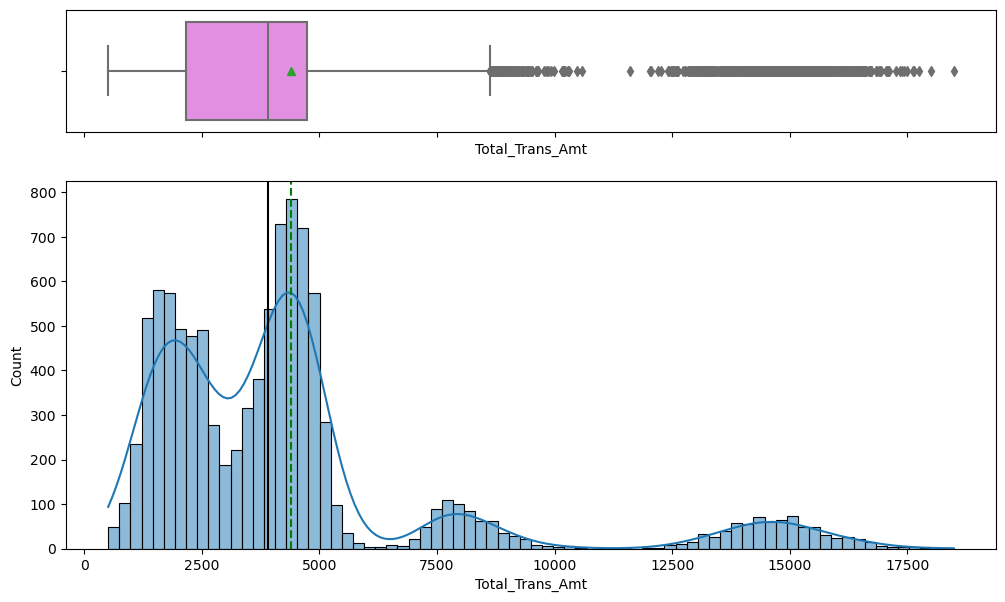

In [38]:
histogram_boxplot(data1, "Total_Trans_Amt", kde=True)  

The total amount distributed appears to have a multimodal distribution, with a mean of 4404 and median of 3899
The data has outliers in both the upper and lower tails of the data

`Total_Ct_Chng_Q4_Q1`

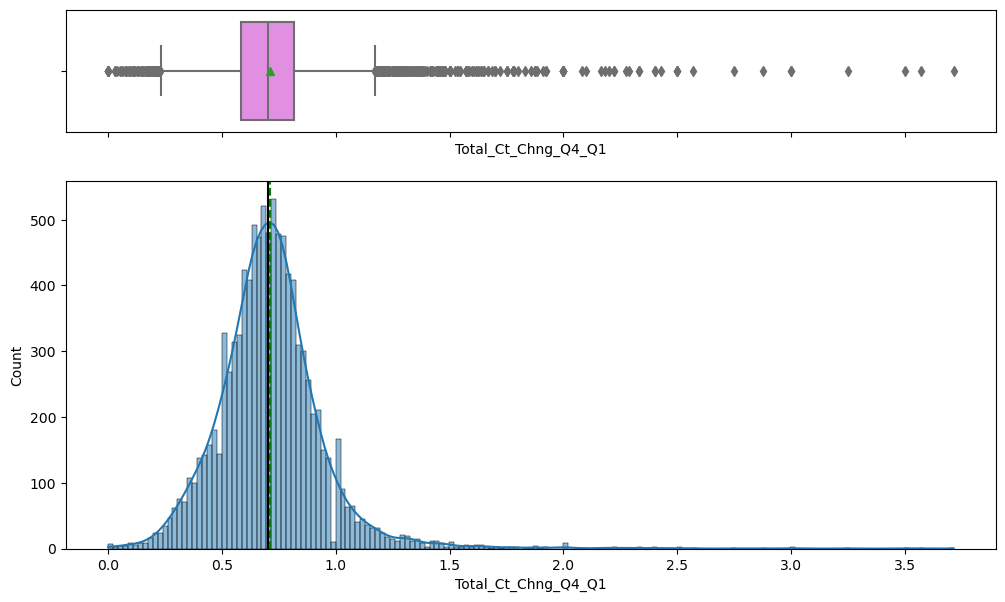

In [39]:
histogram_boxplot(data1, "Total_Ct_Chng_Q4_Q1", kde=True)

The change in transaction count (Q4 over Q1) has a normal distribution with mean of 0.712 and median of 0.702
There are outliers on both the upper and lower ends of the data

**Avg_Utilization_Ratio**

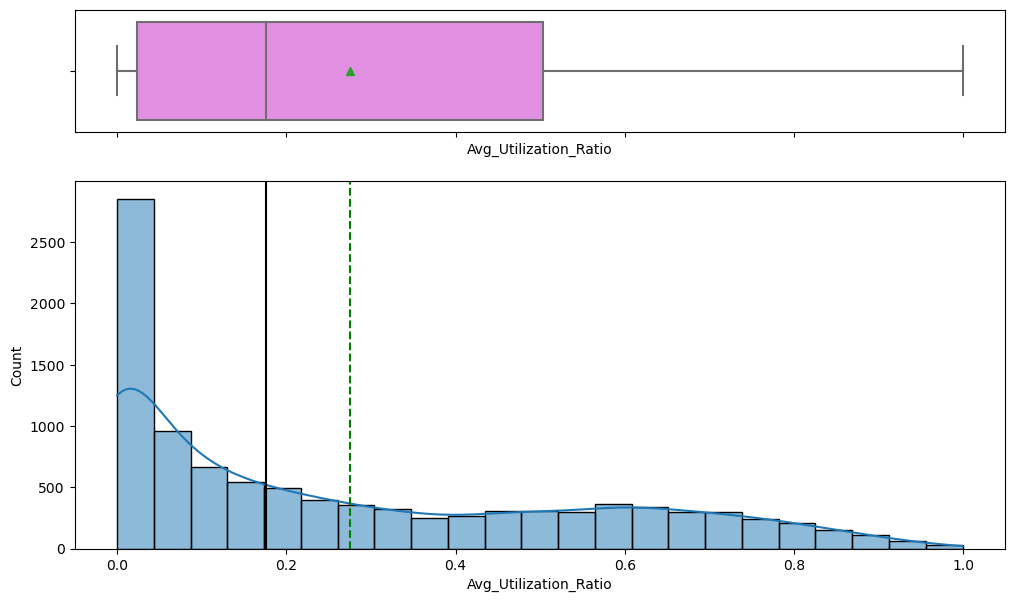

In [40]:
histogram_boxplot(data1, "Avg_Utilization_Ratio", kde=True) 

The average card utilization ration is right skewed and has a mean of 0.275 and median of 0.176
There are no outliers

**Dependent_count**

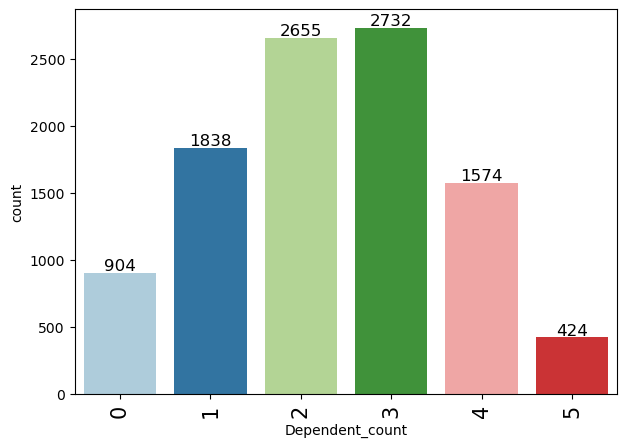

In [41]:
labeled_barplot(data1, "Dependent_count")

There are more custoomers with 3 dependents and 2 dependents respectively. Relatively few customers have five dependents

`Total_Relationship_Count`

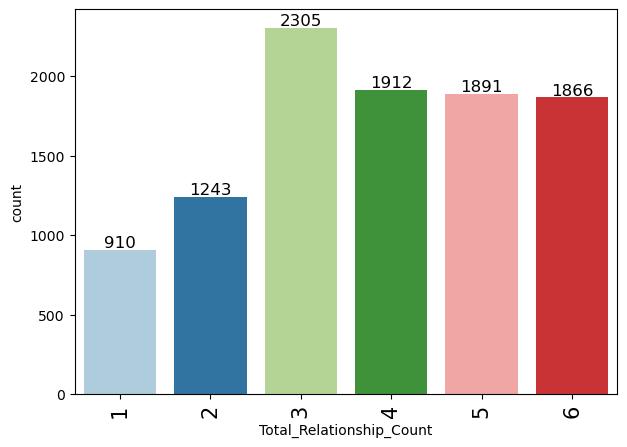

In [43]:
labeled_barplot(data1, "Total_Relationship_Count")

There are 2305 customers who hold 3 products. Approximately 1900 customers hold 4, 5, and 6 products, while relatively fewer customers hold 1 and 2 products

**Months_Inactive_12_mon**

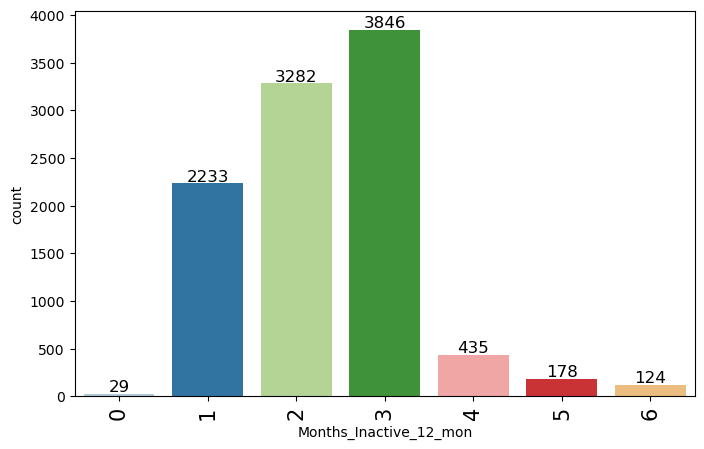

In [44]:
labeled_barplot(data1, "Months_Inactive_12_mon") 

There are more customers that have been inactive for 3 months in the last twelve months. The second highest month of inactivity in the past twelve months is 2. There are relatively fewer customers with 0 >= 4 months of inactivity

**Contacts_Count_12_mon**

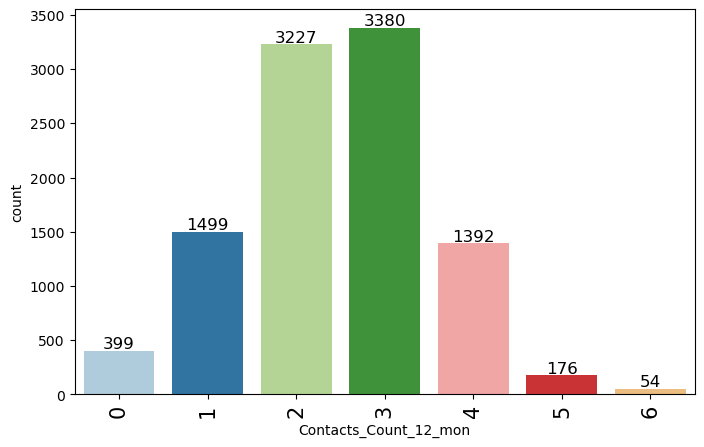

In [45]:
labeled_barplot(data1, "Contacts_Count_12_mon")

**Gender**

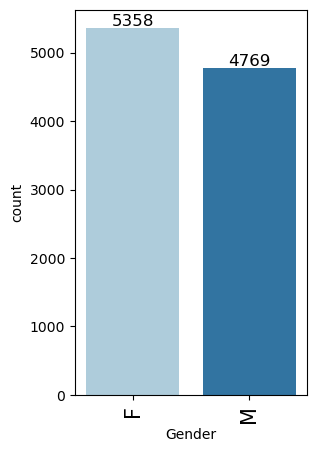

In [46]:
labeled_barplot(data1, "Gender")

There are more female (5358) customers than male (4769) customers

**Education_Level**

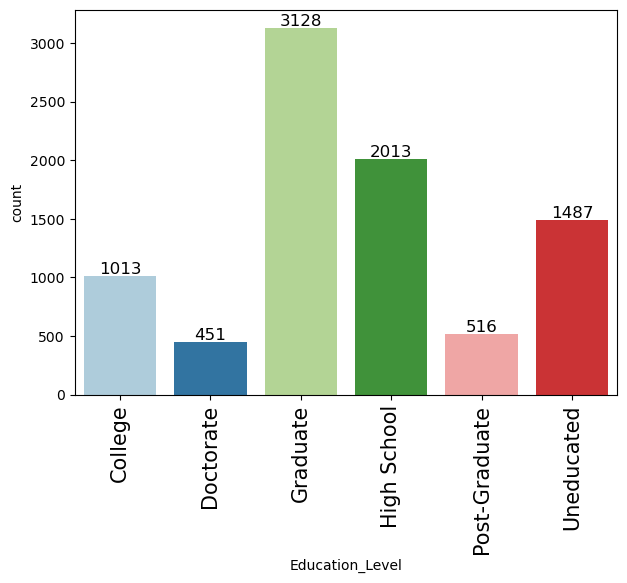

In [47]:
labeled_barplot(data1, "Education_Level")

Majority (3128) of customers have graduate education level. There are 2013 customers with high school education level, 1487 customers who are uneducated, 1013 customers with college level education, 451 customers with doctorate degree and 516 customers with post graduate education 

**Marital_Status**

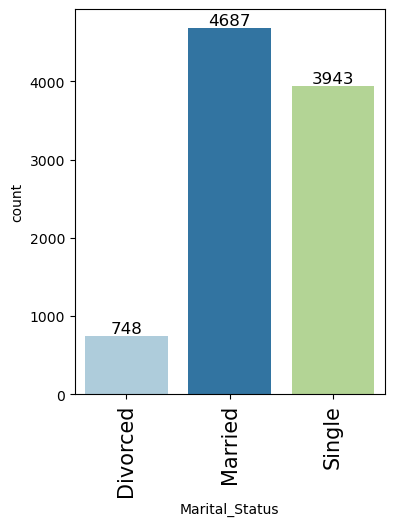

In [49]:
labeled_barplot(data1, "Marital_Status")

* There are more married customers (4687) compared to single (3943) and divorced (748)

**Income_Category**

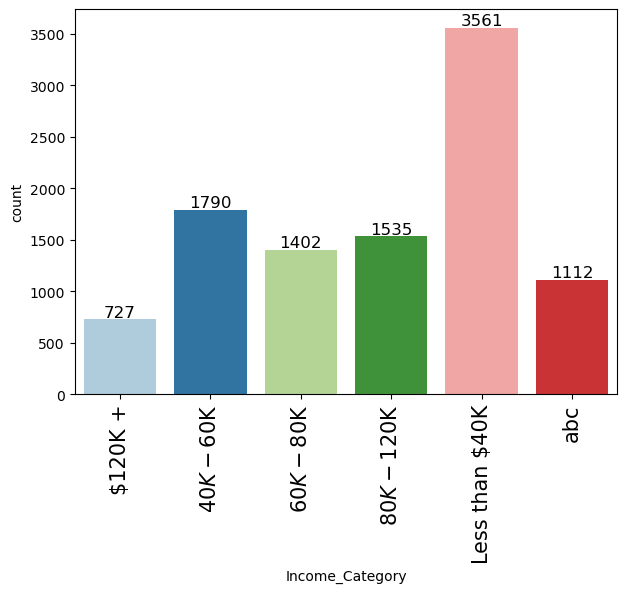

In [50]:
labeled_barplot(data1, "Income_Category") 

* 3561 customers make less than 40K  annually, which represents the majority income group. 1790 customers make 40k - 60K annually, 1204 customers make 60K - 80 K  annually, 1535 customers make 80K - 125K  annually.
* currency = dollars and K = thousand

`Card_Category`

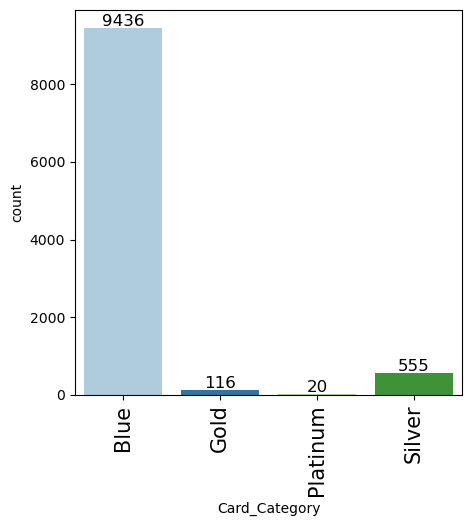

In [52]:
labeled_barplot(data1, "Card_Category")

There are 9436 customers with Blue type of card, 555 customers with silver card, 116 with gold card and 20 with silver card

`Attrition_Flag`

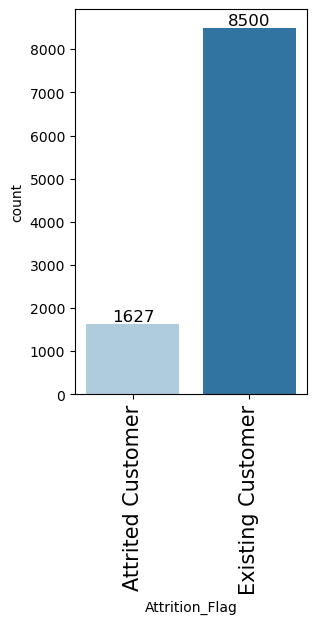

In [53]:
labeled_barplot(data1, "Attrition_Flag")

* There are 1627 customers who have attrited while 8500 are still bank customers

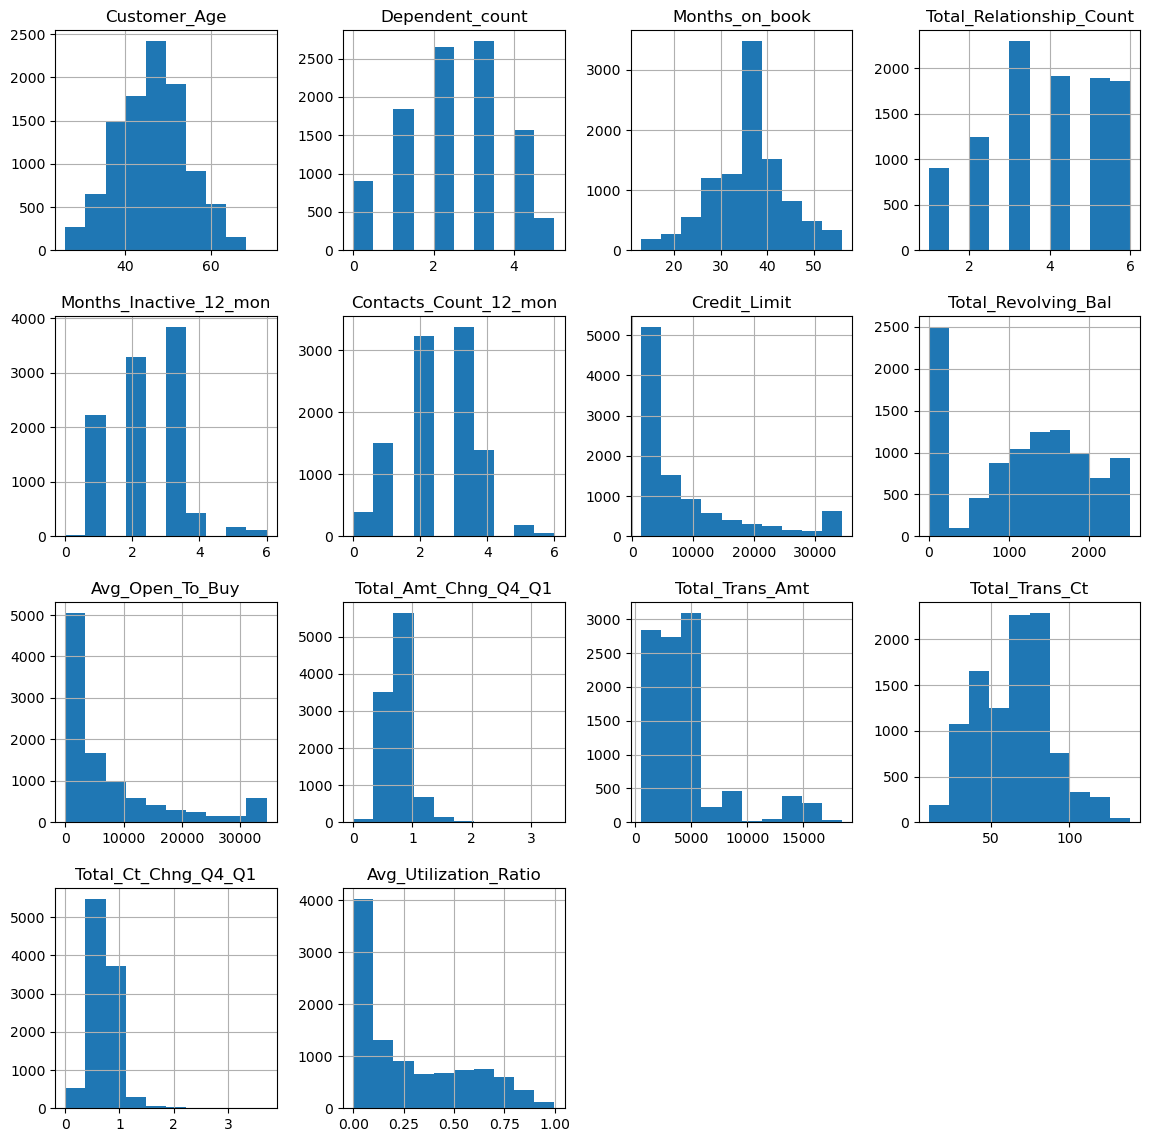

In [54]:
# creating histograms
data1.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

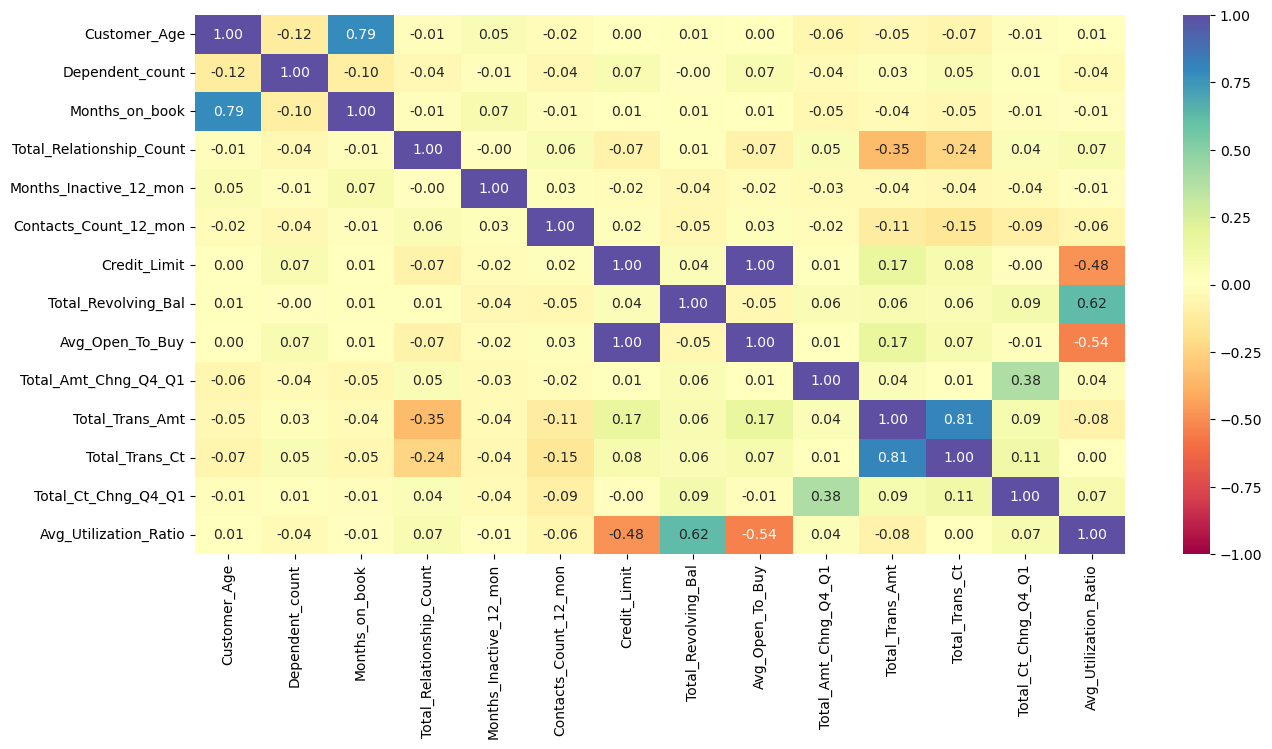

In [55]:
plt.figure(figsize=(15, 7))
sns.heatmap(data1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The customer age has high positive correlation with period of relationship with bank (Month_on_book)
* The avg_Utilization_Ratio has a high positive correlation with Total_Revolving_bal, but has a moderate negative correlation with Open to Buy Credit line (avg in the past 12 month) and credit limit
* The total transaction count in the past 12 months has a high positive correlation with the total transaction amount in the last 12 months. 
* The Total_Relationship_Count has low negative relationship with Total_Trans_Amt and Total_Trans_Ct


**Attrition_Flag vs Gender**

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


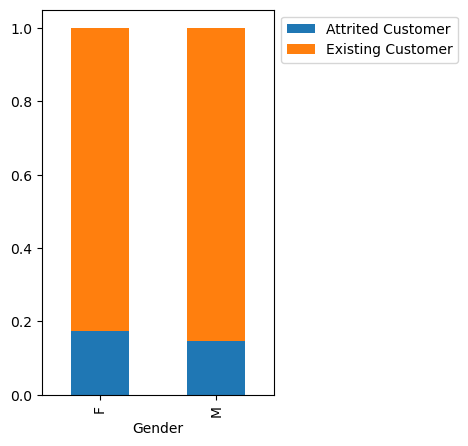

In [57]:
stacked_barplot(data1, "Gender", "Attrition_Flag")

* Female customers are more likely to attrite than male customers

**Attrition_Flag vs Marital_Status**

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


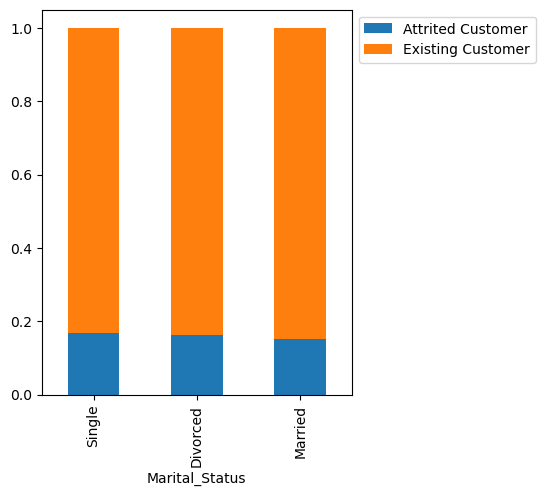

In [58]:
stacked_barplot(data1, "Marital_Status", "Attrition_Flag")

* Proportion of married customers are less likely to attrite than proportion of divorced and single customers who are attriting

**Attrition_Flag vs Education_Level**

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


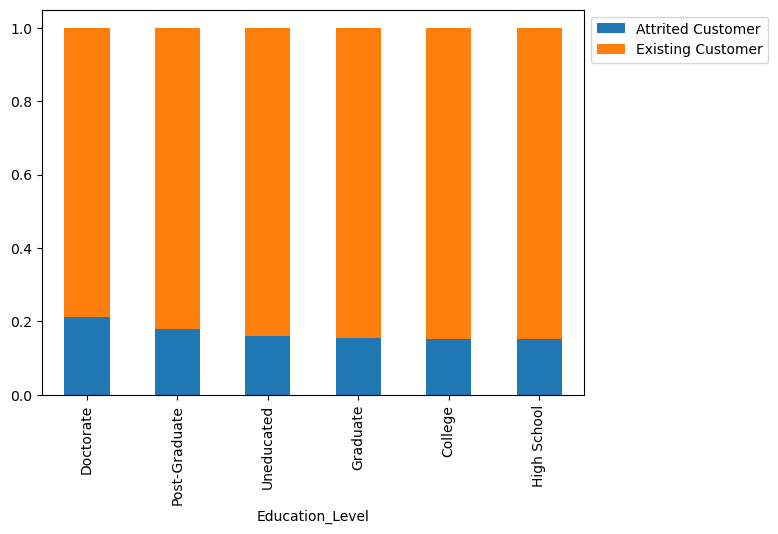

In [59]:
stacked_barplot(data1, "Education_Level", "Attrition_Flag")

* There proportion of attriting doctorate degree holders is more than the proportion of attriting customers for any educational level category
* The data also shows that College and High School educational level have the loest proportion of attriting customers

**Attrition_Flag vs Income_Category**

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


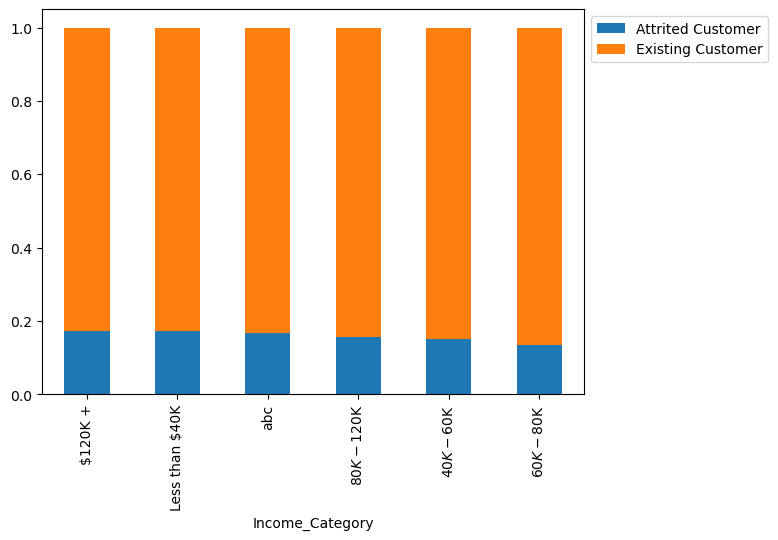

In [60]:
stacked_barplot(data1, "Income_Category", "Attrition_Flag") 

* The proportion of attriting customers earning above 120k is more than the proportion for any other income category 
* Customers earning between 60k to 80k have the lowest proportion of attriting customers

**Attrition_Flag vs Contacts_Count_12_mon**

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


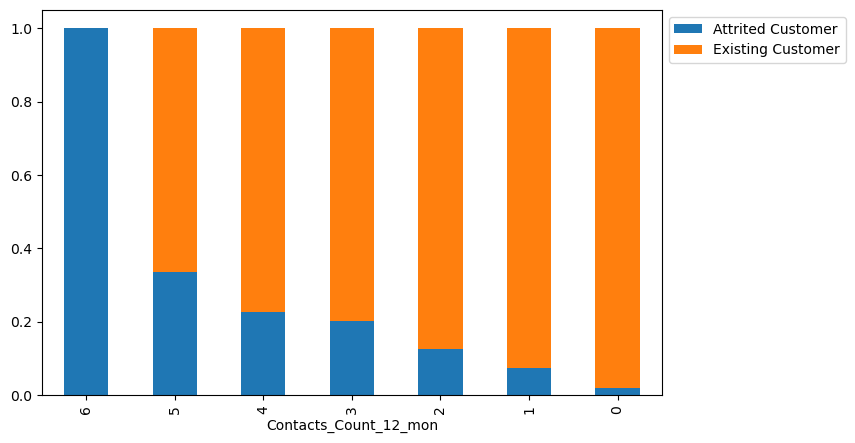

In [63]:
stacked_barplot(data1, "Contacts_Count_12_mon", "Attrition_Flag")

* The number of contacts in the past 12 months is positively correlated to the attrition of customers i.e. Proportion of attriting customers are higher with a higher count of the number of contacts in the past 12 months


**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

**Attrition_Flag vs Months_Inactive_12_mon**

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


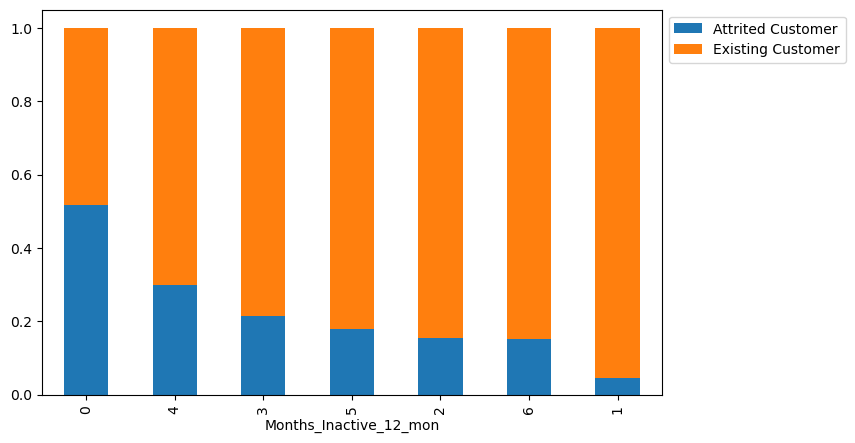

In [64]:
stacked_barplot(data1, "Months_Inactive_12_mon", "Attrition_Flag")

* Customers with one month of inactivity in the last 12 months have the lowest proportion of attriting customers, while the proportion of customers with zero month of inactivity have almost 50% of exiting vs attriting customers. 

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


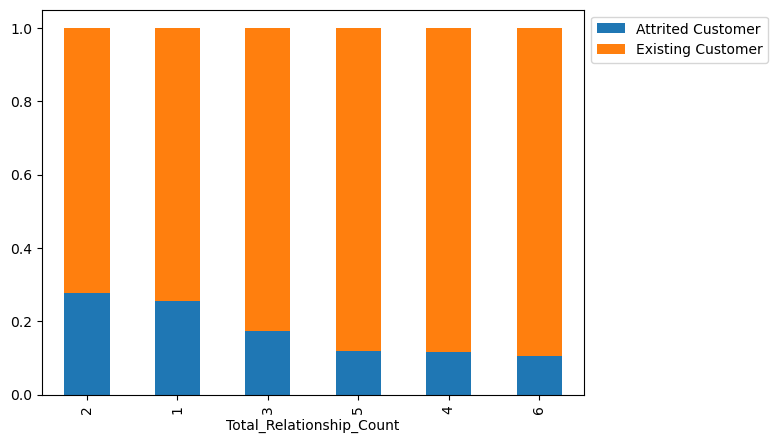

In [65]:
stacked_barplot(data1, "Total_Relationship_Count", "Attrition_Flag")

* There seem to be no strong correlation between the number of products held by customers and the attrition vs existing customers attrition. There are more proportions of attriting customers with 2 products with the bank and lowest proportions of customers with 6 products with the bank  


**Attrition_Flag vs Dependent_count**

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


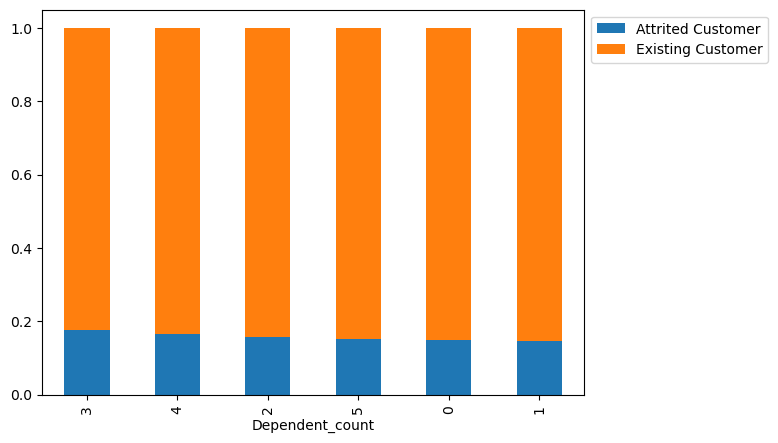

In [66]:
stacked_barplot(data1, "Dependent_count", "Attrition_Flag")

* There is no significant difference in the proportion of attriting customers irrespective of the number of dependents that the customer has

`Total_Revolving_Bal` vs `Attrition_Flag`

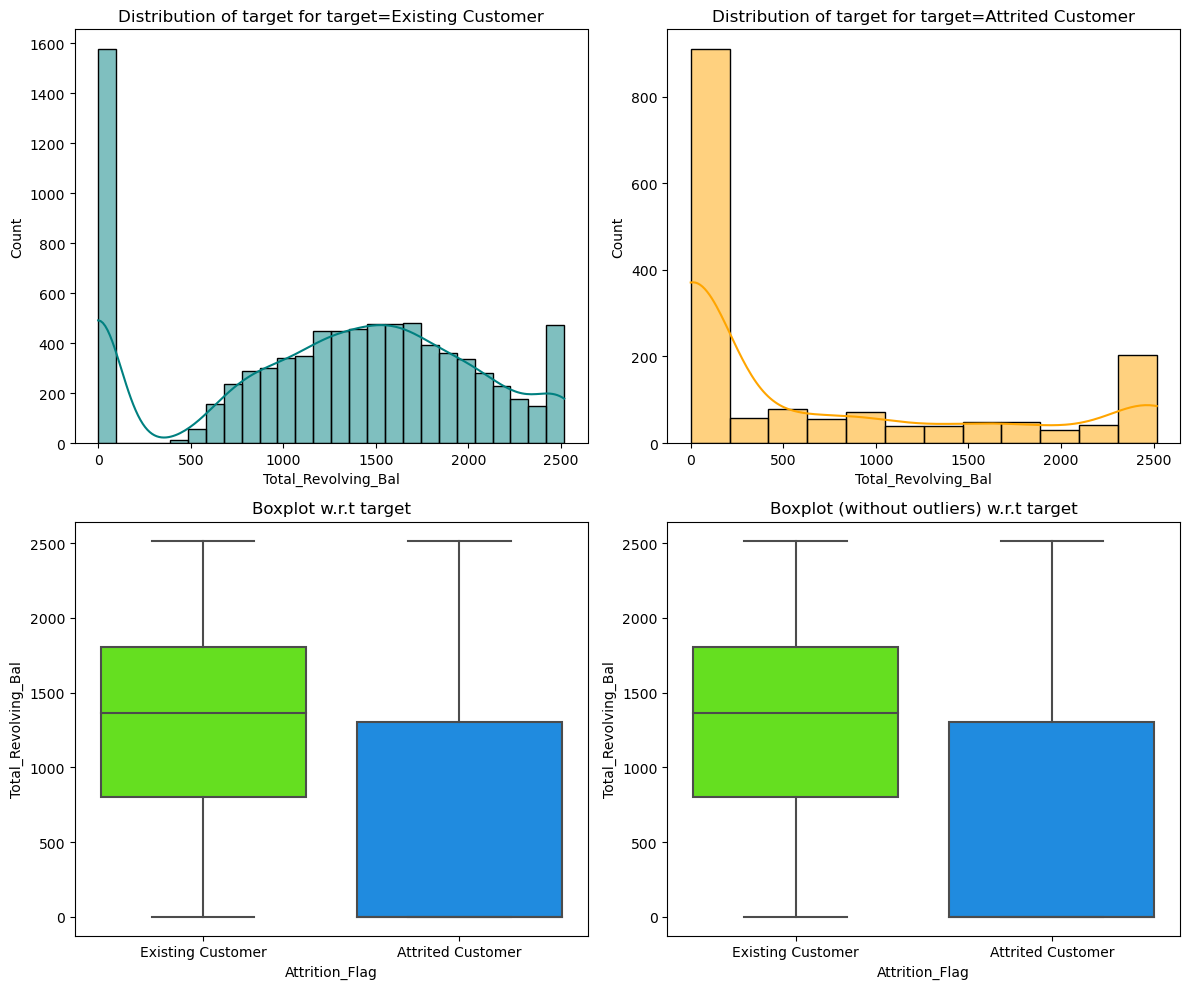

In [67]:
distribution_plot_wrt_target(data1, "Total_Revolving_Bal", "Attrition_Flag")

* Most of the attrition occurs at lower total revolving balance i.e. Existing customers have higher total revoving balance

`Attrition_Flag vs Credit_Limit`

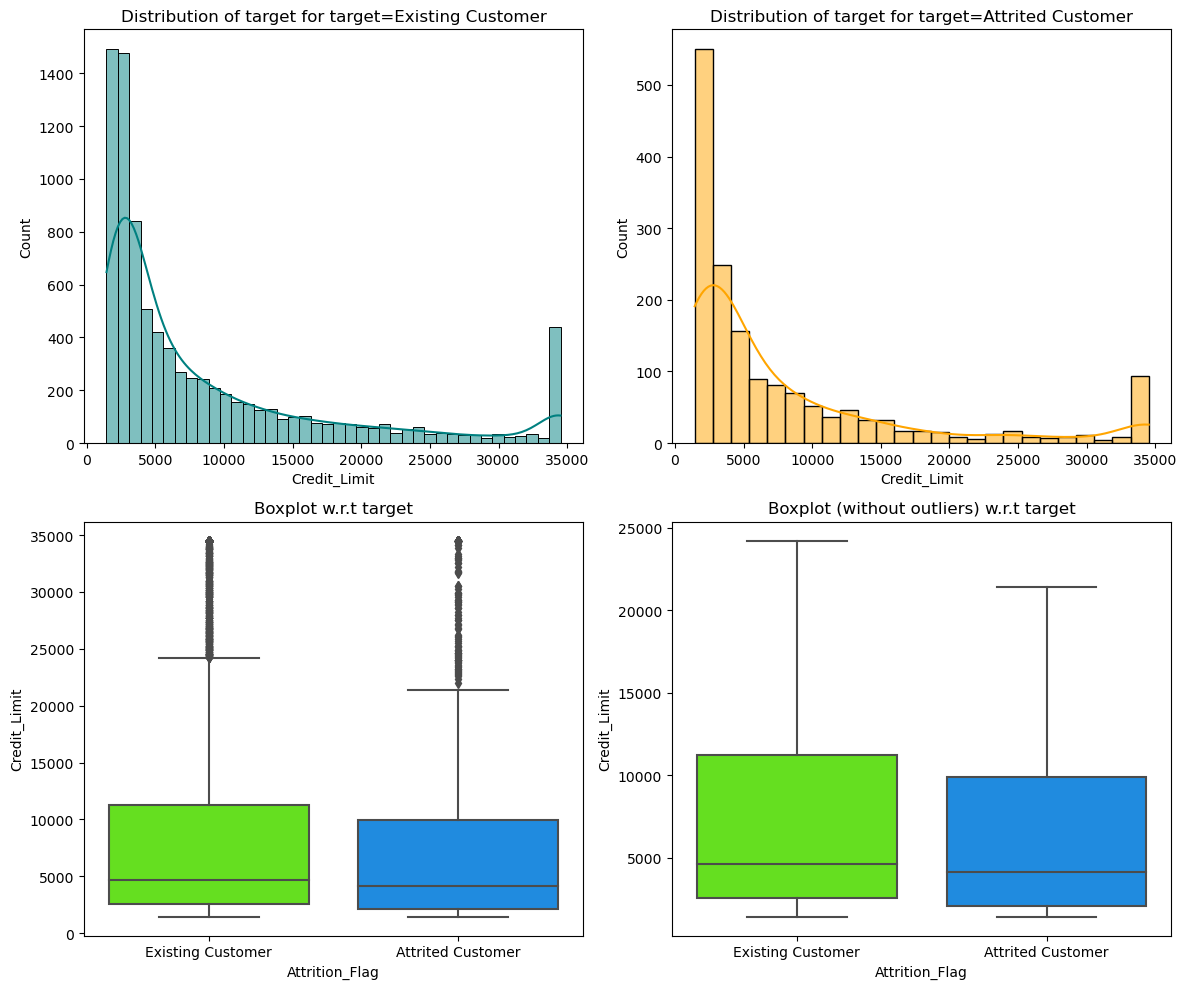

In [68]:
distribution_plot_wrt_target(data1, "Credit_Limit", "Attrition_Flag")

* Attrited customers have only a slight higher credit limit

`Attrition_Flag vs Customer_Age`

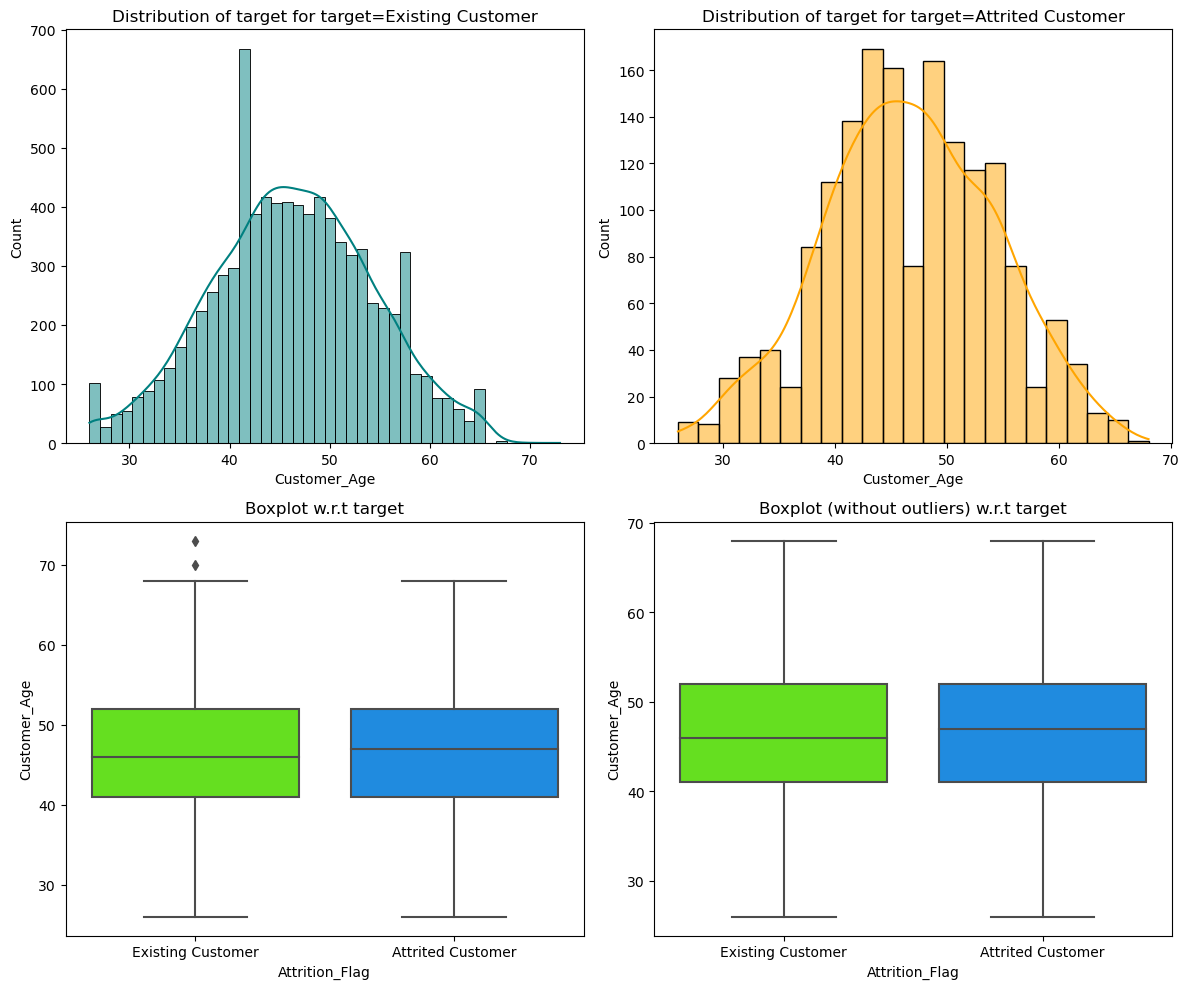

In [69]:
distribution_plot_wrt_target(data1, "Customer_Age", "Attrition_Flag")

* Customer age for attrited customers are higher than existing customers

`Total_Trans_Ct` vs `Attrition_Flag`

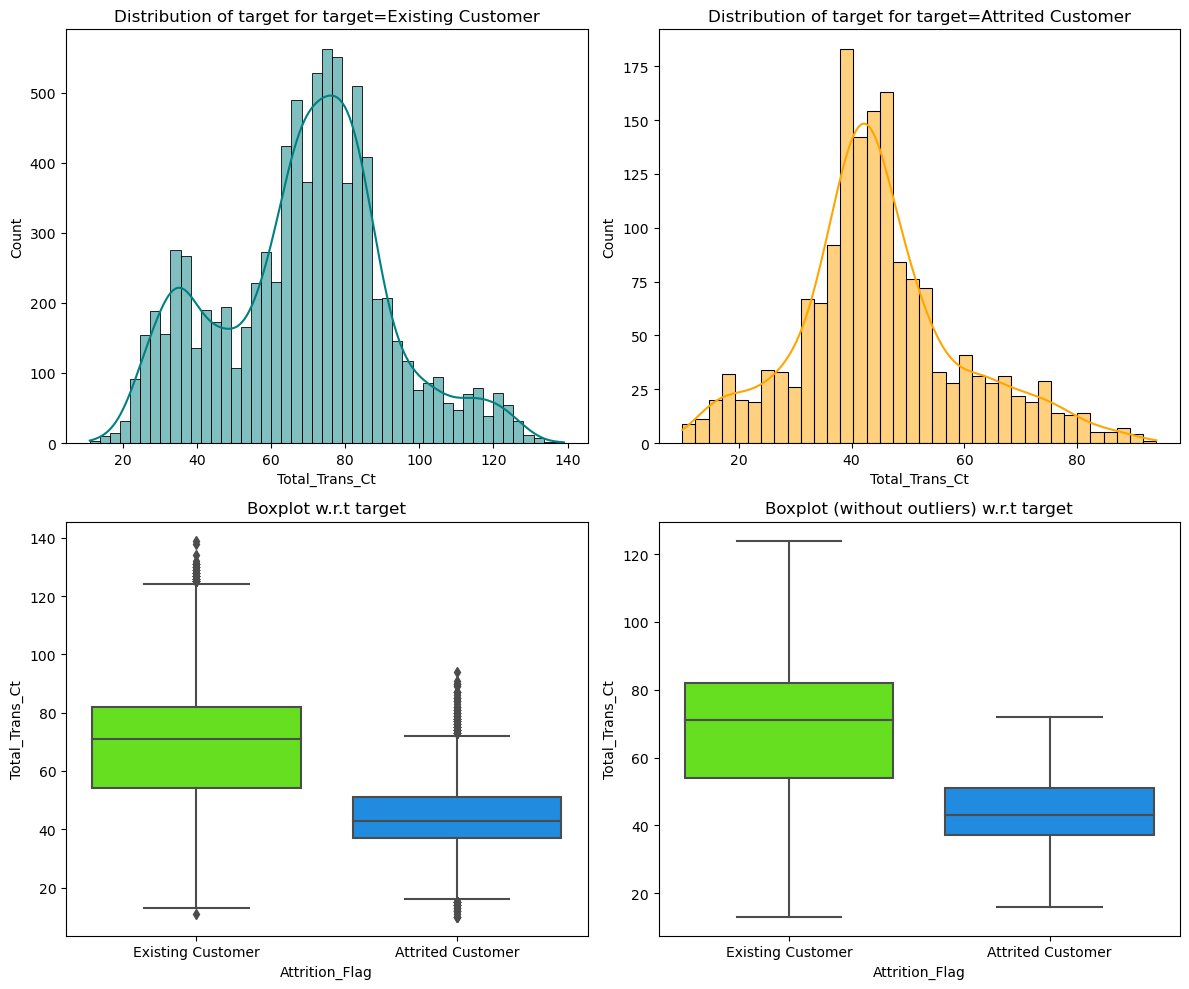

In [70]:
distribution_plot_wrt_target(data1, "Total_Trans_Ct", "Attrition_Flag")

* Attrited customers have lower transaction counts

**Total_Trans_Amt` vs `Attrition_Flag**

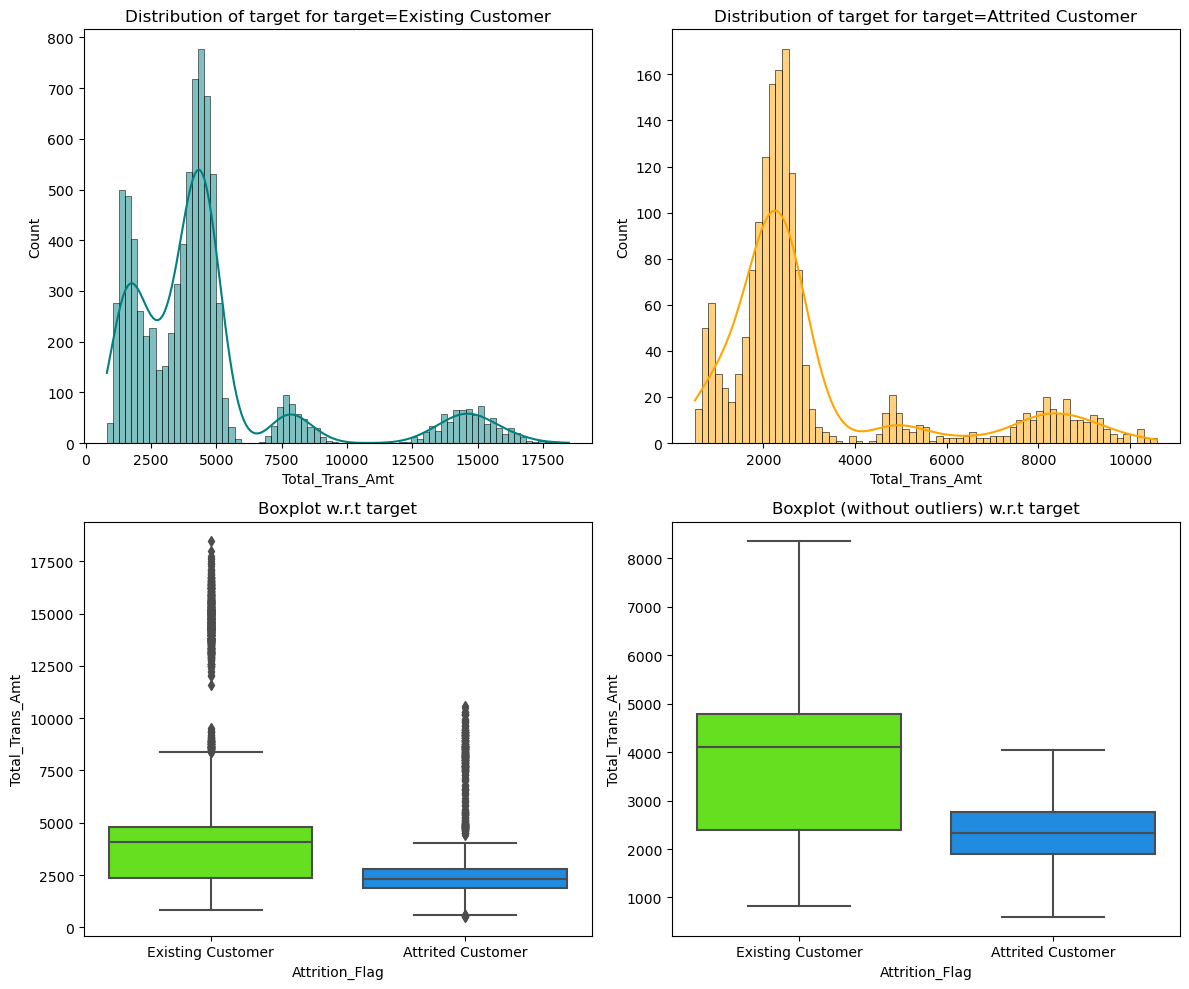

In [71]:
distribution_plot_wrt_target(data1, "Total_Trans_Amt", "Attrition_Flag")

* Attrited customers have lower transaction amounts in the past 12 months

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

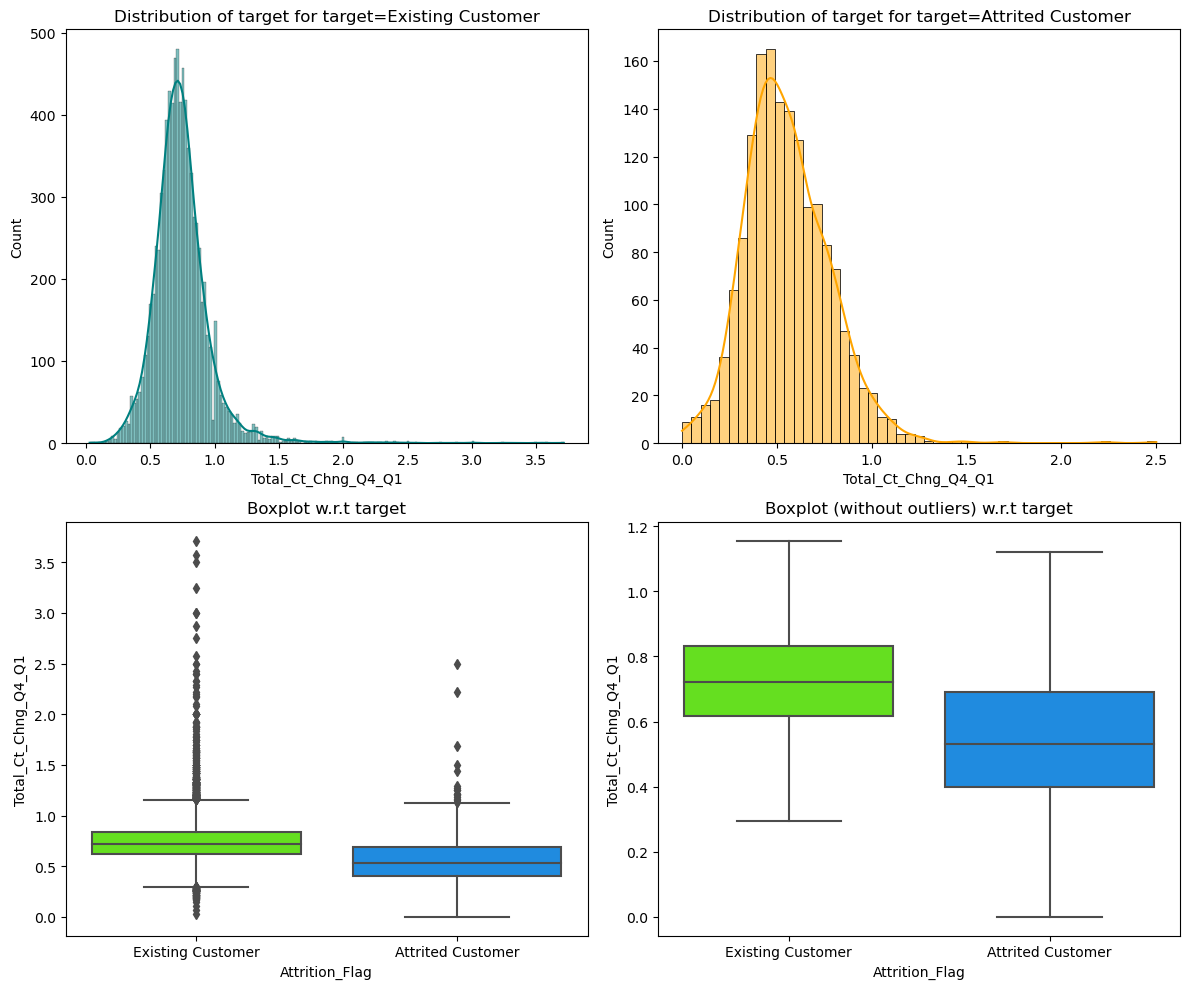

In [72]:
distribution_plot_wrt_target(data1, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") 

* Attrited customers have a higher Change in Transaction Count (Q4 over Q1)

`Avg_Utilization_Ratio` vs `Attrition_Flag`

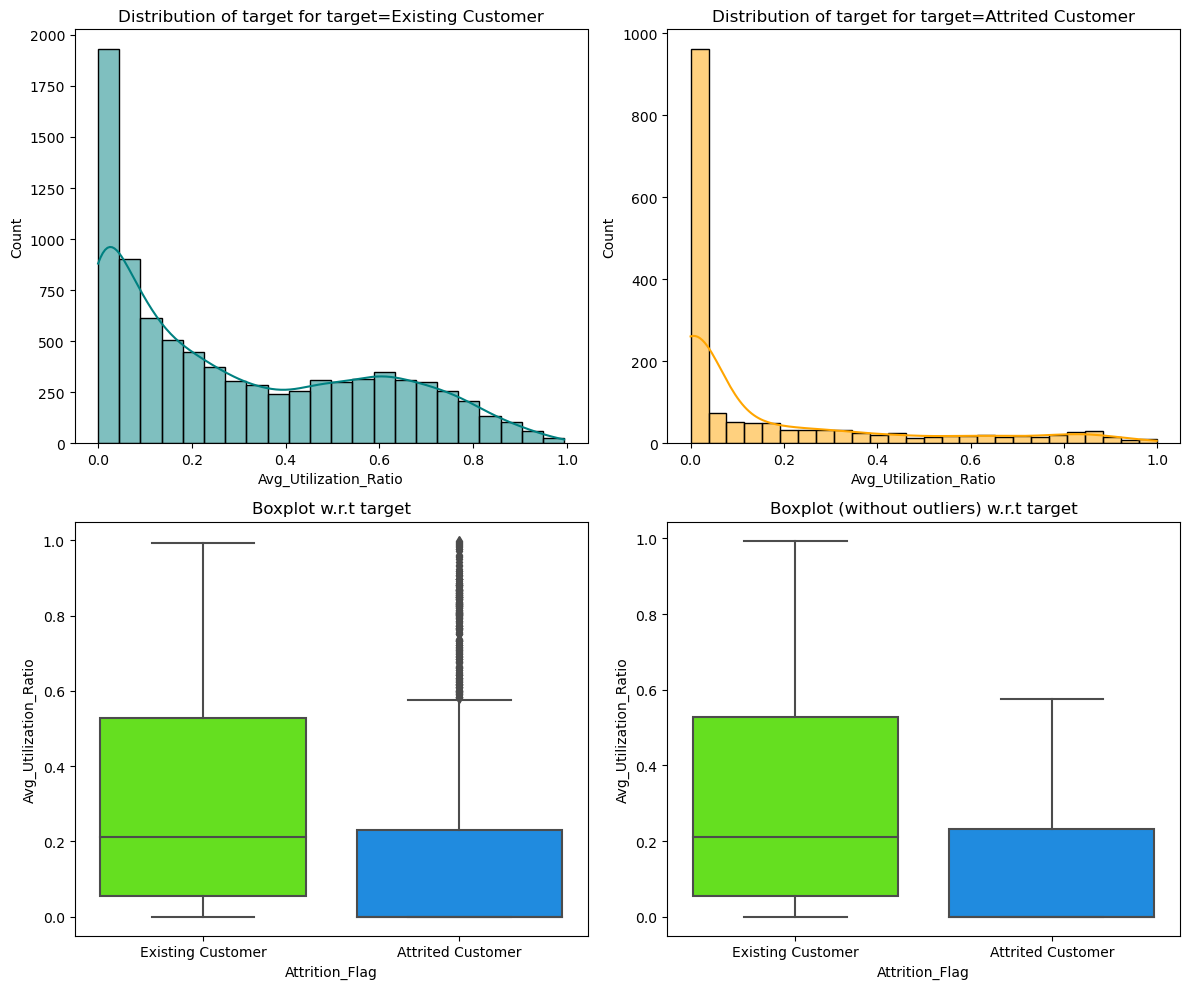

In [73]:
distribution_plot_wrt_target(data1, "Avg_Utilization_Ratio", "Attrition_Flag")

* Attrited customers have a lower Average Card Utilization Ratio


`Attrition_Flag vs Months_on_book`

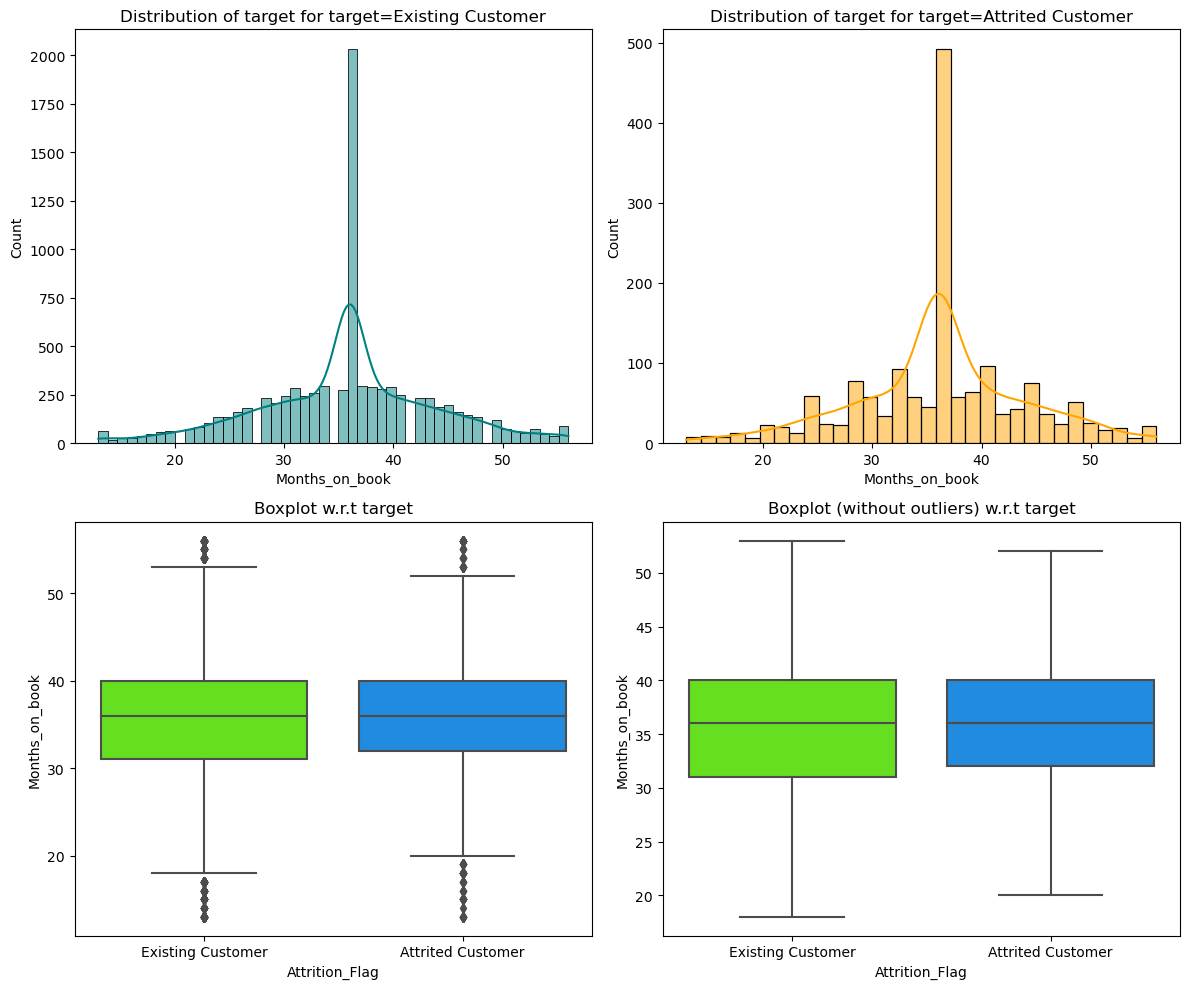

In [75]:
distribution_plot_wrt_target(data1, "Months_on_book", "Attrition_Flag")

* Attrition of customers happen for customers with slightly lower Period of relationship with the bank (in months)

`Attrition_Flag vs Total_Revolving_Bal`

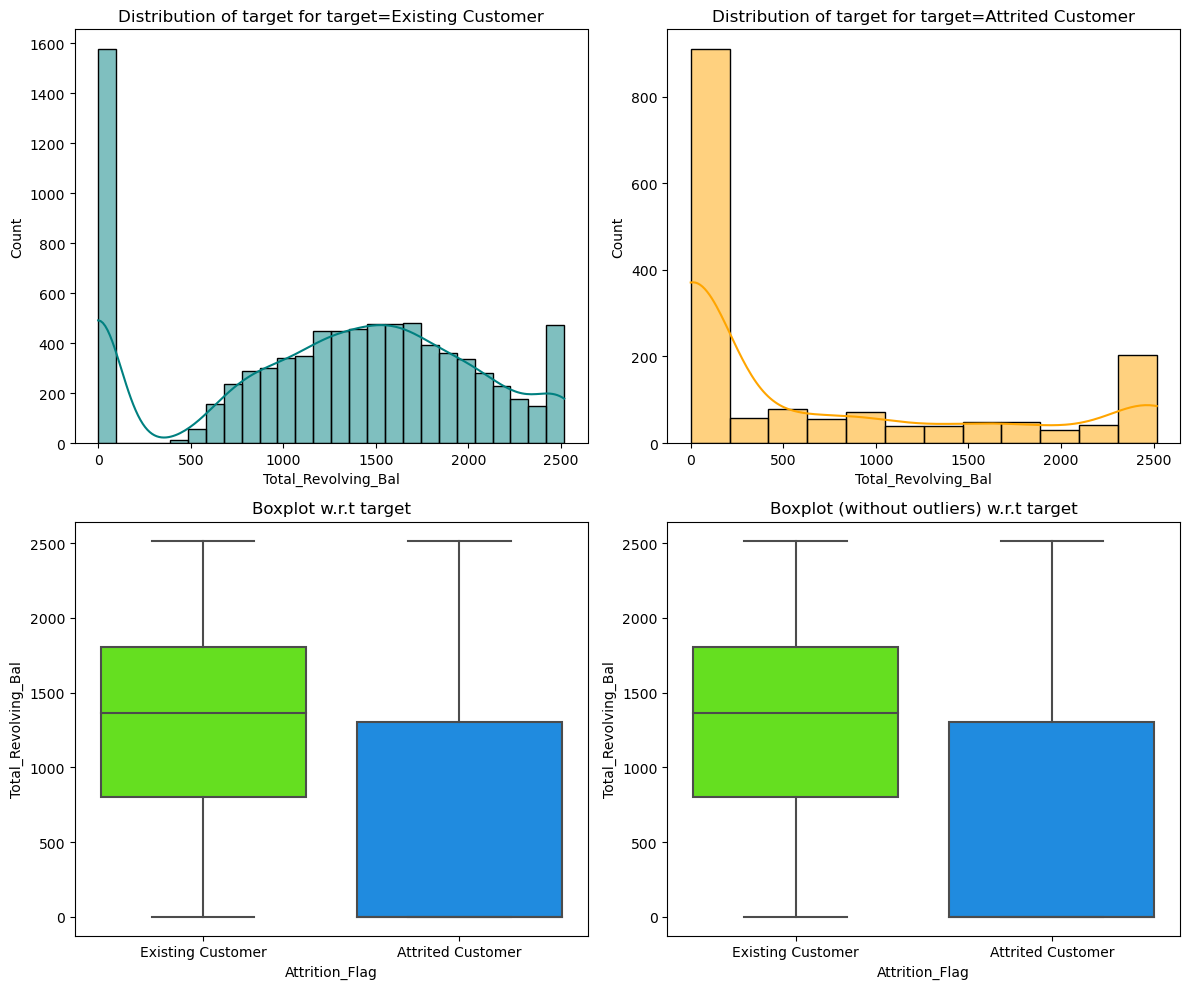

In [76]:
distribution_plot_wrt_target(data1, "Total_Revolving_Bal", "Attrition_Flag")

* Attrition of customers more common with customers who have lower total revolving balance

`Attrition_Flag vs Avg_Open_To_Buy`

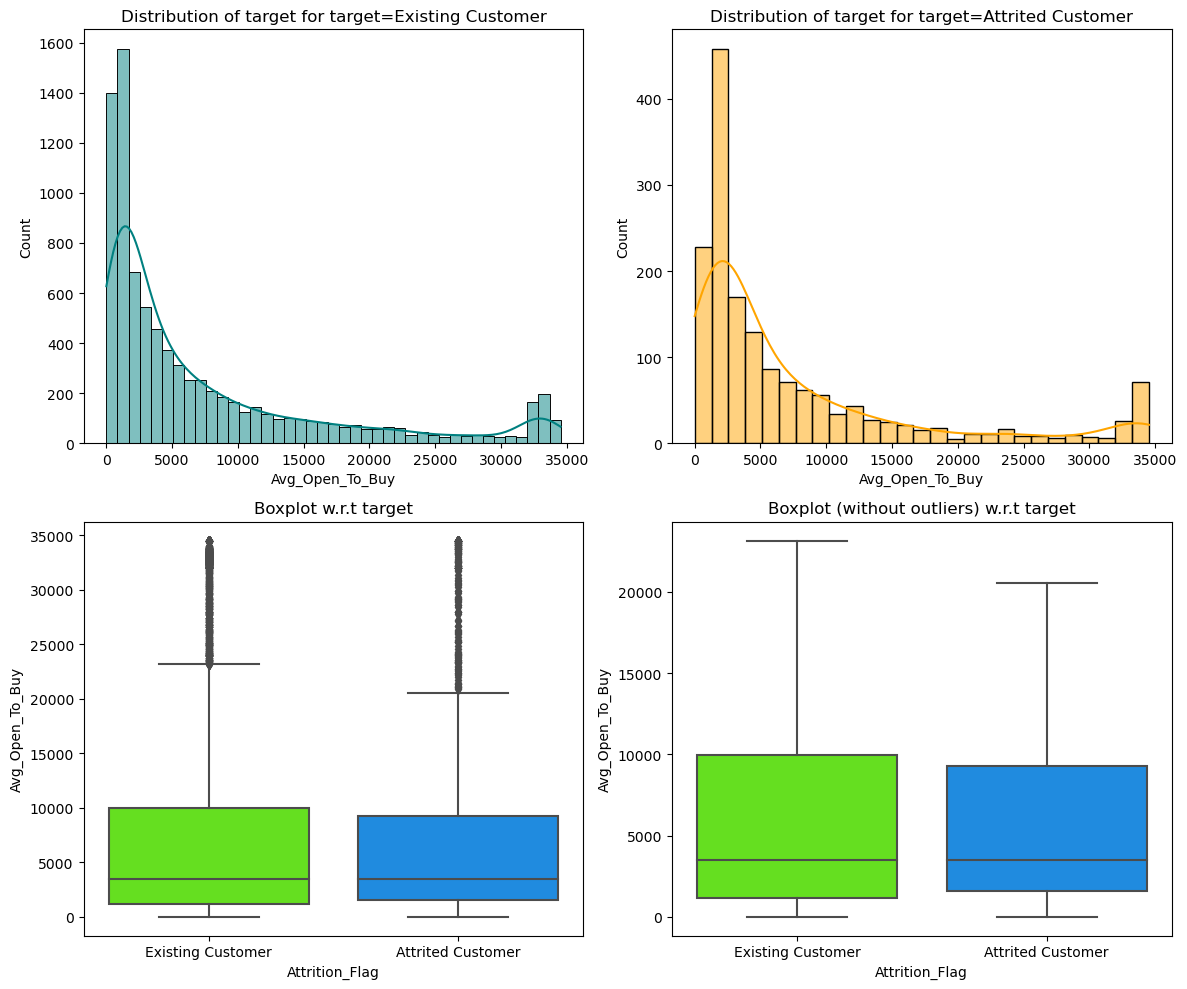

In [78]:
distribution_plot_wrt_target(data1, "Avg_Open_To_Buy", "Attrition_Flag")

* Attrited customers have higher average amount left on their credit card to use compared to existing customers

## Data Preprocessing

### Outlier Detection

In [79]:
Q1 = data1.quantile(0.25)  # To find the 25th percentile 
Q3 = data1.quantile(0.75)  # To find the 75th percentile 

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)  
upper = (Q3 + 1.5 * IQR)

In [80]:
# checking the % outliers 
((data1.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data1) * 100

Attrition_Flag             0.000
Avg_Open_To_Buy            9.509
Avg_Utilization_Ratio      0.000
CLIENTNUM                  0.000
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Customer_Age               0.020
Dependent_count            0.000
Months_Inactive_12_mon     3.268
Months_on_book             3.812
Total_Amt_Chng_Q4_Q1       3.910
Total_Ct_Chng_Q4_Q1        3.891
Total_Relationship_Count   0.000
Total_Revolving_Bal        0.000
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
dtype: float64

### Train-Test Split

In [108]:
#Make a copy of the dataframe used in the above processing so far
data3 = data1.copy()

In [109]:
data3["Income_Category"].replace(['abc'], np.nan, inplace=True)

In [110]:
data3['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', nan], dtype=object)

In [111]:
data3.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [112]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [113]:
# Dividing train data into X and y 

X = data3.drop(["Attrition_Flag"], axis=1)
y = data3["Attrition_Flag"]

In [114]:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(6480, 19) (1621, 19) (2026, 19)


### Missing value imputation

In [115]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [116]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.transform(X_val[reqd_col_for_impute])
# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [117]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* There are no missing values in the dataset

## To get the value counts of categorical columns

In [119]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3388
M    3092
Name: Gender, dtype: int64
******************************
Graduate         2982
High School      1259
Uneducated        946
College           633
Post-Graduate     349
Doctorate         311
Name: Education_Level, dtype: int64
******************************
Married     3480
Single      2530
Divorced     470
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2954
$40K - $60K       1134
$80K - $120K      1021
$60K - $80K        895
$120K +            476
Name: Income_Category, dtype: int64
******************************
Blue        6033
Silver       349
Gold          84
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [120]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    880
M    741
Name: Gender, dtype: int64
******************************
Graduate         739
High School      329
Uneducated       255
College          165
Post-Graduate     76
Doctorate         57
Name: Education_Level, dtype: int64
******************************
Married     877
Single      613
Divorced    131
Name: Marital_Status, dtype: int64
******************************
Less than $40K    767
$40K - $60K       291
$60K - $80K       235
$80K - $120K      217
$120K +           111
Name: Income_Category, dtype: int64
******************************
Blue        1502
Silver        98
Gold          19
Platinum       2
Name: Card_Category, dtype: int64
******************************


In [121]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3388
M    3092
Name: Gender, dtype: int64
******************************
Graduate         2982
High School      1259
Uneducated        946
College           633
Post-Graduate     349
Doctorate         311
Name: Education_Level, dtype: int64
******************************
Married     3480
Single      2530
Divorced     470
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2954
$40K - $60K       1134
$80K - $120K      1021
$60K - $80K        895
$120K +            476
Name: Income_Category, dtype: int64
******************************
Blue        6033
Silver       349
Gold          84
Platinum      14
Name: Card_Category, dtype: int64
******************************


### Encoding categorical variables

In [122]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True) 
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6480, 29) (1621, 29) (2026, 29)


* After encoding there are 29 columns.

In [123]:
# check the top 5 rows from the train dataset 
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9698,50,0,38,2,3,1,4935.000,1574,3361.000,1.010,8527,84,0.500,0.319,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1800,35,3,24,3,2,2,2066.000,1699,367.000,0.624,1895,43,0.536,0.822,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
7175,45,3,39,1,3,3,8383.000,0,8383.000,0.809,2600,44,0.517,0.000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
5230,58,3,46,3,1,3,2375.000,1163,1212.000,0.917,4769,80,0.905,0.490,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2660,48,2,29,6,2,3,24446.000,1854,22592.000,0.782,3897,75,0.786,0.076,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [138]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [280]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [272]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

from sklearn.metrics import recall_score

print("\nTraining Performance:\n")

# Encode the true labels
y_train_encoded = label_encoder.transform(y_train)

for name, model in models:
    model.fit(X_train, y_train_encoded)
    # Encode the predicted labels
    y_pred_encoded = model.predict(X_train)
    # Compute recall score using the encoded labels
    scores = recall_score(y_train_encoded, y_pred_encoded, pos_label=label_encoder.transform(['Existing Customer'])[0]) * 100
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")

# Encode the true labels
y_val_encoded = label_encoder.transform(y_val)

for name, model in models:
    # Encode the predicted labels
    y_pred_encoded = model.predict(X_val)
    # Compute recall score using the encoded labels
    scores = recall_score(y_val_encoded, y_pred_encoded, pos_label=label_encoder.transform(['Existing Customer'])[0]) * 100
    print("{}: {}".format(name, scores))



Training Performance:

Logistic regression: 96.28608200036771
Bagging: 99.85291413862842
Random forest: 100.0
GBM: 99.28295642581358
Adaboost: 98.06949806949807
Xgboost: 100.0

Validation Performance:

Logistic regression: 96.61764705882354
Bagging: 97.35294117647058
Random forest: 98.6029411764706
GBM: 98.6764705882353
Adaboost: 97.86764705882352
Xgboost: 98.6764705882353


- Xgboost and GBM have the best performance on validation, followed by adaboost

### Model Building - Oversampled Data

In [208]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 0
Before Oversampling, counts of label 'No': 0 

After Oversampling, counts of label 'Yes': 0
After Oversampling, counts of label 'No': 0 

After Oversampling, the shape of train_X: (10878, 29)
After Oversampling, the shape of train_y: (10878,) 



In [273]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for target variable
label_encoder = LabelEncoder()
y_train_over_encoded = label_encoder.fit_transform(y_train_over)
y_train_encoded = label_encoder.transform(y_train)

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over_encoded)
    y_train_pred = model.predict(X_train)
    scores = recall_score(y_train_encoded, y_train_pred, pos_label=1)
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over_encoded)
    y_val_pred = model.predict(X_val)
    y_val_pred = label_encoder.inverse_transform(y_val_pred)  # Transform predicted labels back to original string values
    scores = recall_score(y_val, y_val_pred, pos_label='Existing Customer')
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.8144879573451002
Bagging: 0.996506710792425
Random forest: 1.0
GBM: 0.976098547527119
Adaboost: 0.9591836734693877
Xgboost: 1.0

Validation Performance:

Logistic regression: 0.8198529411764706
Bagging: 0.9477941176470588
Random forest: 0.975
GBM: 0.9647058823529412
Adaboost: 0.9455882352941176
Xgboost: 0.9772058823529411


- XGboost has the best performance on validation followed by GBM

### Model Building - Undersampled Data

In [210]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [211]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 0
Before Under Sampling, counts of label 'No': 0 

After Under Sampling, counts of label 'Yes': 0
After Under Sampling, counts of label 'No': 0 

After Under Sampling, the shape of train_X: (2082, 29)
After Under Sampling, the shape of train_y: (2082,) 



In [266]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
import xgboost as xgb

# Label encoding for target variable
label_encoder = LabelEncoder()
y_train_un_encoded = label_encoder.fit_transform(y_train_un)
y_train_encoded = label_encoder.transform(y_train)

models = []
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

# Convert training data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_un, label=y_train_un_encoded)

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1, eval_metric="logloss")
models.append(("XGBoost", xgb_model))

print("\nTraining Performance:\n")
for name, model in models:
    if name == "XGBoost":
        model.fit(X_train_un, y_train_un_encoded)
        y_train_pred = model.predict(X_train_un)
    else:
        model.fit(X_train_un, y_train_un)
        y_train_pred = model.predict(X_train_un)
    
    # Replace NaN values in predictions with a placeholder value
    y_train_pred = [pred if pred is not np.nan else "NaN" for pred in y_train_pred]
    
    # Encode predicted labels manually, handling NaN values
    unique_labels = np.unique(y_train_pred)
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    y_train_pred_encoded = np.array([label_mapping.get(label, -1) for label in y_train_pred])
    
    scores = recall_score(y_train_un_encoded, y_train_pred_encoded, average='weighted')
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    if name == "XGBoost":
        model.fit(X_train_un, y_train_un_encoded)
        y_val_pred = model.predict(X_val)
    else:
        model.fit(X_train_un, y_train_un)
        y_val_pred = model.predict(X_val)
    
    # Replace NaN values in predictions with a placeholder value
    y_val_pred = [pred if pred is not np.nan else "NaN" for pred in y_val_pred]
    
    # Encode predicted labels manually, handling NaN values
    unique_labels = np.unique(y_train_pred)
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    y_val_pred_encoded = np.array([label_mapping.get(label, -1) for label in y_val_pred])
    
    scores = recall_score(label_encoder.transform(y_val), y_val_pred_encoded, average='weighted')
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.8112391930835735
Bagging: 0.994716618635927
Random forest: 1.0
GBM: 0.9779058597502401
Adaboost: 0.9495677233429395
XGBoost: 1.0

Validation Performance:

Logistic regression: 0.0
Bagging: 0.0
Random forest: 0.0
GBM: 0.0
Adaboost: 0.0
XGBoost: 0.9500308451573103


- XGboost has the best performance

### Hyperparameter Tuning

#### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using Undersampled data

In [267]:
%%time

from sklearn import metrics

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs=-1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=nan:
Wall time: 1min 57s


In [268]:
# Creating new pipeline with best parameters
tuned_ada1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1)
)

# Fitting the model on undersampled data
tuned_ada1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [269]:
def model_performance_classification_sklearn(model, predictors, target, pos_label):
    pred = model.predict(predictors)
    
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred, pos_label=pos_label)
    precision = precision_score(target, pred, pos_label=pos_label)
    f1 = f1_score(target, pred, pos_label=pos_label)
    
    return {
        "Accuracy": acc,
        "Recall": recall,
        "Precision": precision,
        "F1-score": f1
    }


In [274]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(tuned_ada1, X_train_un, y_train_un, pos_label='Existing Customer')
adb1_train

{'Accuracy': 0.5,
 'Recall': 1.0,
 'Precision': 0.5,
 'F1-score': 0.6666666666666666}

In [275]:
# Checking model's performance on validation set
adb1_val = tuned_ada1.predict(X_val)
model_performance_classification_sklearn(tuned_ada1, X_val, y_val, pos_label='Existing Customer')

{'Accuracy': 0.8389882788402221,
 'Recall': 1.0,
 'Precision': 0.8389882788402221,
 'F1-score': 0.9124454880912446}

#### Tuning AdaBoost using original data

In [287]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1), 'learning_rate': 0.1, 'n_estimators': 10} 
Score: nan
Wall time: 5min 35s


In [288]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1)
)

# Fitting the model on undersampled data
tuned_ada2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=10, random_state=1)

In [290]:
def model_performance_classification_sklearn(model, predictors, target, pos_label):
    pred = model.predict(predictors)
    
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred, pos_label=pos_label)
    precision = precision_score(target, pred, pos_label=pos_label)
    f1 = f1_score(target, pred, pos_label=pos_label)
    
    return {
        "Accuracy": acc,
        "Recall": recall,
        "Precision": precision,
        "F1-score": f1
    }

In [291]:
#check the performance on training set
adb2_train = model_performance_classification_sklearn(tuned_ada2, X_train_un, y_train_un, pos_label='Existing Customer')
adb2_train

{'Accuracy': 0.5,
 'Recall': 1.0,
 'Precision': 0.5,
 'F1-score': 0.6666666666666666}

In [292]:
# Checking model's performance on validation set
adb2_val = tuned_ada2.predict(X_val)
model_performance_classification_sklearn(tuned_ada2, X_val, y_val, pos_label='Existing Customer')

{'Accuracy': 0.8389882788402221,
 'Recall': 1.0,
 'Precision': 0.8389882788402221,
 'F1-score': 0.9124454880912446}

#### Tuning Gradient Boosting using undersampled data

In [228]:
%%time

# Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=nan
Wall time: 1min 45s


In [229]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.5,
)

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [246]:
## Check the performance on oversampled train set
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train, pos_label='Existing Customer') 
gbm1_train

{'Accuracy': 0.950462962962963,
 'Recall': 0.9452105166390881,
 'Precision': 0.9955460883036406,
 'F1-score': 0.969725549372819}

In [247]:
gbm1_val = tuned_gbm1.predict(X_val)
model_performance_classification_sklearn(tuned_gbm1, X_val, y_val, pos_label='Existing Customer')

{'Accuracy': 0.9438618136952498,
 'Recall': 0.9404411764705882,
 'Precision': 0.9922420480993018,
 'F1-score': 0.9656474141185353}

#### Tuning Gradient Boosting using original data

In [239]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=nan:
Wall time: 1min 42s


In [240]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.5,
)

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [241]:
## Check the performance on oversampled train set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train, y_train, pos_label='Existing Customer')  
gbm2_train


{'Accuracy': 0.9745370370370371,
 'Recall': 0.9933811362382791,
 'Precision': 0.9766811279826464,
 'F1-score': 0.9849603500136723}

In [243]:
## Complete the code to check the performance on validation set
gbm2_val = tuned_gbm2.predict(X_val)
model_performance_classification_sklearn(tuned_gbm2, X_val, y_val, pos_label='Existing Customer') 

{'Accuracy': 0.9673041332510796,
 'Recall': 0.9897058823529412,
 'Precision': 0.9718411552346571,
 'F1-score': 0.9806921675774135}

In [294]:
def model_performance_classification_sklearn(model, X, y):
    y_pred = model.predict(X)
    accuracy = metrics.accuracy_score(y, y_pred)
    recall = metrics.recall_score(y, y_pred)
    precision = metrics.precision_score(y, y_pred)
    f1_score = metrics.f1_score(y, y_pred)
    
    performance = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1-score': f1_score
    }
    
    return performance

## Model Comparison and Final Model Selection

In [295]:
# Creating a DataFrame from the dictionaries
models_train_comp_df = pd.DataFrame({
    'Gradient boosting trained with Undersampled data': gbm1_train,
    'Gradient boosting trained with Original data': gbm2_train,
    'AdaBoost trained with Undersampled data': adb1_train,
    'AdaBoost trained with Original data': adb2_train,
}, index=['Accuracy', 'Recall', 'Precision', 'F1-score'])

# Transposing the DataFrame
models_train_comp_df = models_train_comp_df.T

# Displaying the training performance comparison DataFrame
print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Accuracy,Recall,Precision,F1-score
Gradient boosting trained with Undersampled data,0.950,0.945,0.996,0.970
Gradient boosting trained with Original data,0.975,0.993,0.977,0.985
AdaBoost trained with Undersampled data,0.500,1.000,0.500,0.667
AdaBoost trained with Original data,0.500,1.000,0.500,0.667


####  Observations 
- On comparing CV scores and the training score, Gradient boosting using undersampled data is giving the better results. 

Since, Adaboost model is underfitting, we will go ahead with GBM.

Adaboost models trained with RandomSearchCV and GridSearchCV have thesame performance scores


Let's check the model's performance on test set and then see the feature importance from the tuned Gradient boost model

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [306]:
def model_performance_classification_sklearn(model, predictors, target, pos_label):
    pred = model.predict(predictors)
    
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred, pos_label=pos_label)
    precision = precision_score(target, pred, pos_label=pos_label)
    f1 = f1_score(target, pred, pos_label=pos_label)
    
    return {
        "Accuracy": acc,
        "Recall": recall,
        "Precision": precision,
        "F1-score": f1
    }

In [309]:
# Calculate performance metrics on the test set
gbm1_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test, pos_label='Existing Customer')

# Display the performance on the oversampled test set
print("Performance on oversampled test set:")
print(gbm1_test)

Performance on oversampled test set:
{'Accuracy': 0.947680157946693, 'Recall': 0.9423868312757202, 'Precision': 0.9950341402855369, 'F1-score': 0.9679951690821256}


### Feature Importances

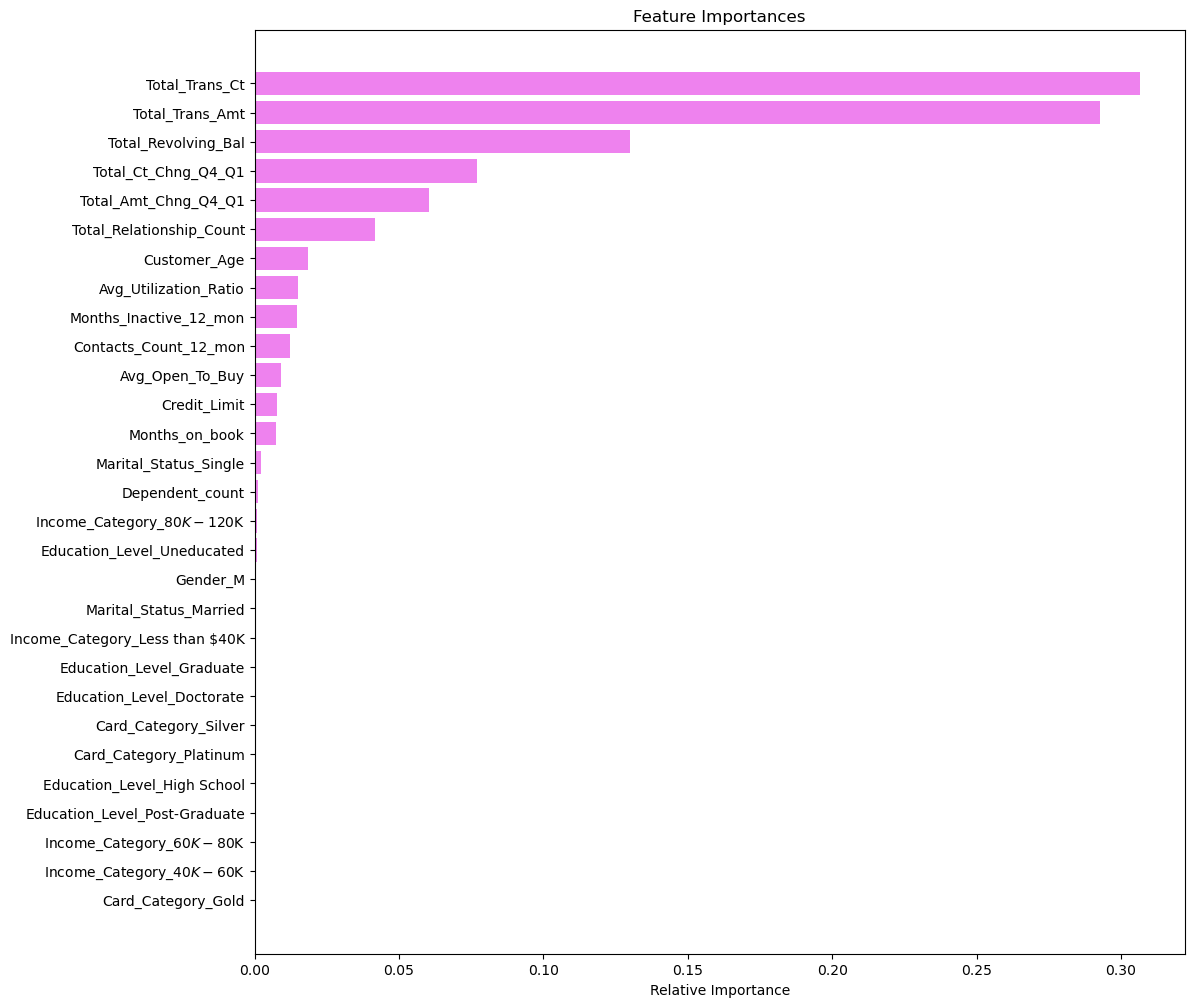

In [310]:
feature_names = X_train.columns
importances =  tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####  Observations 
- Total transaction count in the last 12 months is the most important feature, followed by Total transaction amount in the last 12 months

## Let's use Pipelines to build the final model

- Let's use pipelines to build the final model
- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [311]:
# creating a list of numerical variables
numerical_features = [
     'Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 



In [316]:
data4 = data1.copy

In [318]:
# Separating target variable and other variables
X = data3.drop(columns="Attrition_Flag") 
Y = data3["Attrition_Flag"] 

- Let's first do some basic pre-processing

In [315]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
#X.drop(["CLIENTNUM"], axis=1, inplace=True)

In [319]:
X["Income_Category"].replace("abc", np.nan, inplace=True) ##  impute the missing values with nan 

In [320]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
Y.replace("Existing Customer", 0, inplace=True)
Y.replace("Attrited Customer", 1, inplace=True)

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [321]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [322]:

# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "gbm1",
            GradientBoostingClassifier(
                max_features=0.7,
                init=AdaBoostClassifier(random_state=1),
                random_state=1,
                learning_rate=0.1,
                n_estimators=100,
                subsample=0.5,
            ),
        ),
    ]
)

# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
             

In [323]:
X_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7403,38,M,0,NaN,Married,$60K - $80K,Blue,26,5,2,1,3809.000,1521,2288.000,0.692,4666,69,0.865,0.399
2005,39,M,2,Uneducated,Married,$120K +,Blue,26,2,3,4,8906.000,0,8906.000,0.315,809,15,0.250,0.000
8270,45,M,4,Doctorate,Married,$80K - $120K,Blue,39,2,3,2,1438.300,1162,276.300,0.539,4598,86,0.623,0.808
646,41,M,3,Graduate,Single,$80K - $120K,Blue,26,4,3,2,11806.000,1811,9995.000,0.754,1465,31,0.476,0.153
1690,65,F,1,NaN,Single,$40K - $60K,Blue,48,4,2,4,4599.000,637,3962.000,0.622,2608,78,0.592,0.139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,53,F,4,Graduate,Divorced,$40K - $60K,Blue,45,5,3,1,3369.000,2424,945.000,0.825,5220,78,0.592,0.720
3434,46,M,5,High School,NaN,$120K +,Blue,26,4,3,3,34516.000,772,33744.000,0.979,3699,77,0.878,0.022
9023,45,M,5,Graduate,Married,$80K - $120K,Blue,40,1,2,0,29227.000,1151,28076.000,0.730,8420,100,0.852,0.039
6599,55,F,5,High School,Single,Less than $40K,Blue,49,6,2,1,2177.000,1472,705.000,0.787,5228,77,0.674,0.676


In [326]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Business Insights and Conclusions


* Thera bank should target customers who have higher total transaction count and higher total transaction amount
* The data shows that customers with higher revolving balance are my likely to remain with the bank and therefore should be targeted
* The data shows that Attrited customers have a lower Average Card Utilization Ratio. Such customers should be targeted with reward programs to help retain them and avoid them from leaving the bank
* Customers with one month of inactivity in the last 12 months have the lowest proportion of attriting customers, while the proportion of customers with zero month of inactivity have almost 50% of exiting vs attriting customers.
* Customers with Higher number of contacts should be targeted and encouraged to stay with Thera Bank as such customers are more likely to attrite 
* There seem to be no strong correlation between the number of products held by customers and the attrition vs existing customers attrition. There are more proportions of attriting customers with 2 products with the bank and lowest proportions of customers with 6 products with the bank
* Changing or tuning the hyperparameters can give a different result and consequently a different business persective


***